### **PART 1**

# ***We will be working only with the Air Quality Dataste***

In [77]:
#set working directory
from google.colab import drive   # I import files from Google Drive to Google colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
#install all the packages needed to make the research
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import copy
sns.set(style='ticks')

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [79]:
#In this first part we will be working only with the Air Quality Dataset
path="/content/drive/MyDrive/MSSP607/d. project/Project #4 Individual /Combo/Air pollutants (short-combo).xlsx"
df_Air_Pol= pd.read_excel(path)
df_Air_Pol.head()

,WHO Region,ISO3,WHO Country Name,City or Locality,State,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3)
0,African Region,MUS,Mauritius,Bramsthan,NaN,2010,NaN,36.55,NaN
1,African Region,MUS,Mauritius,Port Louis,NaN,2010,NaN,21.80,NaN
2,African Region,NGA,Nigeria,Lagos,NaN,2010,27.43,NaN,NaN
3,African Region,SEN,Senegal,Dakar,NaN,2010,NaN,NaN,22.07
4,African Region,ZAF,South Africa,City Of Cape Town,NaN,2010,NaN,31.52,47.80


# **1.1 Descriptive Analytics of the three Air Pollutants**

In [80]:
#PM2.5 (μg/m3)
pm25_stats = df_Air_Pol['PM2.5 (μg/m3)'].describe()
print(pm25_stats)

count   15032.00
mean       22.92
std        17.93
min         0.01
25%        10.34
50%        16.00
75%        31.00
max       191.90
Name: PM2.5 (μg/m3), dtype: float64


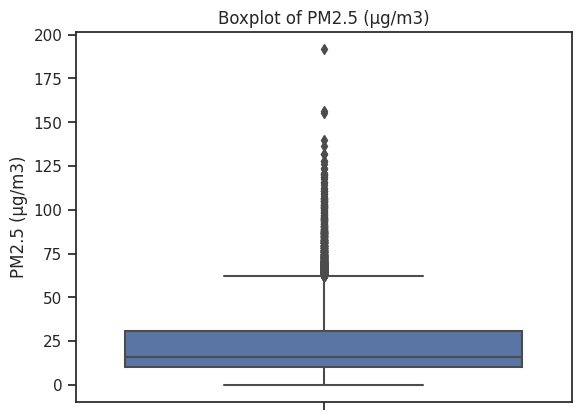

In [81]:
#plot the outliers
sns.boxplot(y=df_Air_Pol['PM2.5 (μg/m3)'])
plt.title('Boxplot of PM2.5 (μg/m3)')
plt.ylabel('PM2.5 (μg/m3)')
plt.show()

In [82]:
#PM10 (μg/m3)
pm10_stats = df_Air_Pol['PM10 (μg/m3)'].describe()
print(pm10_stats)

count   21071.00
mean       30.39
std        28.98
min         1.04
25%        16.97
50%        22.00
75%        31.21
max       540.00
Name: PM10 (μg/m3), dtype: float64


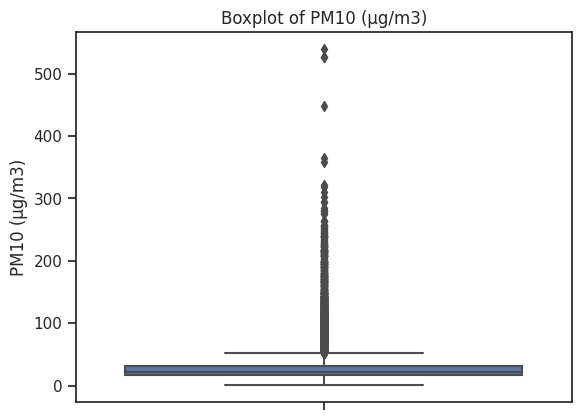

In [83]:

sns.boxplot(y=df_Air_Pol['PM10 (μg/m3)'])
plt.title('Boxplot of PM10 (μg/m3)')
plt.ylabel('PM10 (μg/m3)')
plt.show()

In [84]:
#NO2 (μg/m3)
NO2_stats = df_Air_Pol['NO2 (μg/m3)'].describe()
print(NO2_stats)

count   22186.00
mean       20.62
std        12.14
min         0.00
25%        12.00
50%        18.80
75%        27.17
max       210.68
Name: NO2 (μg/m3), dtype: float64


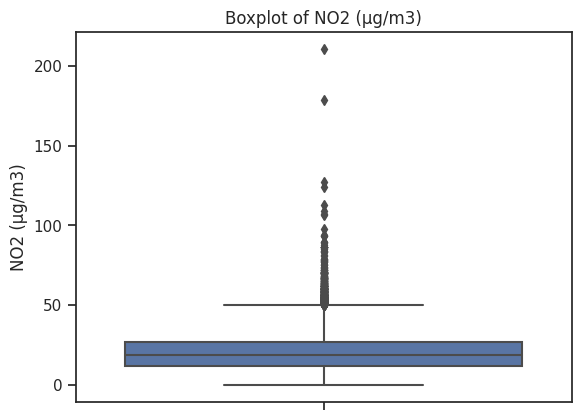

In [85]:
sns.boxplot(y=df_Air_Pol['NO2 (μg/m3)'])
plt.title('Boxplot of NO2 (μg/m3)')
plt.ylabel('NO2 (μg/m3)')
plt.show()

# **1.2. MAPS**

In [86]:
unique_country_names = df_Air_Pol['WHO Country Name'].unique()
print(unique_country_names)

['Mauritius' 'Nigeria' 'Senegal' 'South Africa' 'Bahrain'
 'Iran (Islamic Republic of)' 'Pakistan' 'Tunisia' 'Austria' 'Belgium'
 'Bulgaria' 'Bosnia and Herzegovina' 'Switzerland' 'Cyprus' 'Czechia'
 'Germany' 'Denmark' 'Spain' 'Estonia' 'Finland' 'France' 'United Kingdom'
 'Greece' 'Croatia' 'Hungary' 'Ireland' 'Iceland' 'Italy' 'Lithuania'
 'Luxembourg' 'Latvia' 'North Macedonia' 'Malta' 'Montenegro'
 'Netherlands' 'Norway' 'Poland' 'Portugal' 'Romania' 'Serbia' 'Slovakia'
 'Slovenia' 'Sweden' 'Turkey' 'Brazil' 'Chile' 'Colombia' 'Ecuador'
 'Mexico' 'Peru' 'Paraguay' 'El Salvador' 'United States of America'
 'Bangladesh' 'Bhutan' 'India' 'Australia' 'Japan' 'Republic of Korea'
 'Mongolia' 'Malaysia' 'Singapore' 'Liechtenstein'
 'United Republic of Tanzania' 'United Arab Emirates' 'Morocco'
 'Guatemala' 'Venezuela (Bolivarian Republic of)' 'Indonesia' 'Sri Lanka'
 'Maldives' 'China' 'Viet Nam' 'Cameroon' 'Ghana' 'Lebanon' 'Andorra'
 'Israel' 'Jamaica' 'Myanmar' 'New Zealand' 'Philippi

In [87]:
region_countries_count = df_Air_Pol.groupby('WHO Region')['WHO Country Name'].nunique()

# Displaying the count of countries for each WHO Region
for region, count in region_countries_count.items():
    print(f'{region}: {count} countries')

African Region: 12 countries
Eastern Mediterranean Region: 14 countries
European Region: 48 countries
Region of the Americas: 22 countries
South East Asia Region: 9 countries
Western Pacific Region: 12 countries


<ipython-input-88-b3e5f98499ab>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


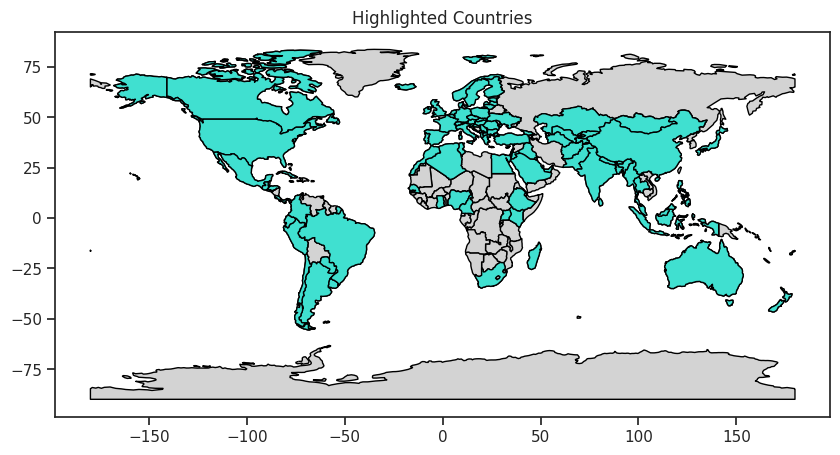

In [88]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming 'world' is a GeoDataFrame containing country boundaries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Assuming 'unique_country_names' contains the list of country names
# Filtering the world map GeoDataFrame for countries in the list
filtered_world = world[world['name'].isin(unique_country_names)]

# Plotting the map with highlighted countries
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
filtered_world.plot(ax=ax, color='Turquoise', edgecolor='black')
plt.title('Highlighted Countries')
plt.show()

In [89]:
region_countries_mapping = df_Air_Pol.groupby('WHO Region')['WHO Country Name'].unique()

# Displaying the mapping for each WHO Region
for region, countries in region_countries_mapping.items():
    print(f'{region}: {countries}')

African Region: ['Mauritius' 'Nigeria' 'Senegal' 'South Africa'
 'United Republic of Tanzania' 'Cameroon' 'Ghana' 'Uganda' 'Madagascar'
 'Ethiopia' 'Kenya' 'Algeria']
Eastern Mediterranean Region: ['Bahrain' 'Iran (Islamic Republic of)' 'Pakistan' 'Tunisia'
 'United Arab Emirates' 'Morocco' 'Lebanon' 'Egypt' 'Kuwait'
 'Saudi Arabia' 'Iraq' 'Jordan' 'Qatar' 'Afghanistan']
European Region: ['Austria' 'Belgium' 'Bulgaria' 'Bosnia and Herzegovina' 'Switzerland'
 'Cyprus' 'Czechia' 'Germany' 'Denmark' 'Spain' 'Estonia' 'Finland'
 'France' 'United Kingdom' 'Greece' 'Croatia' 'Hungary' 'Ireland'
 'Iceland' 'Italy' 'Lithuania' 'Luxembourg' 'Latvia' 'North Macedonia'
 'Malta' 'Montenegro' 'Netherlands' 'Norway' 'Poland' 'Portugal' 'Romania'
 'Serbia' 'Slovakia' 'Slovenia' 'Sweden' 'Turkey' 'Andorra' 'Israel'
 'Monaco' 'Albania' 'Georgia' 'Russian Federation' 'Kazakhstan' 'Ukraine'
 'Uzbekistan' 'Kyrgyzstan' 'Tajikistan' 'Turkmenistan']
Region of the Americas: ['Brazil' 'Chile' 'Colombia' 'Ecuad

<ipython-input-90-405231e36858>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-90-405231e36858>:28: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


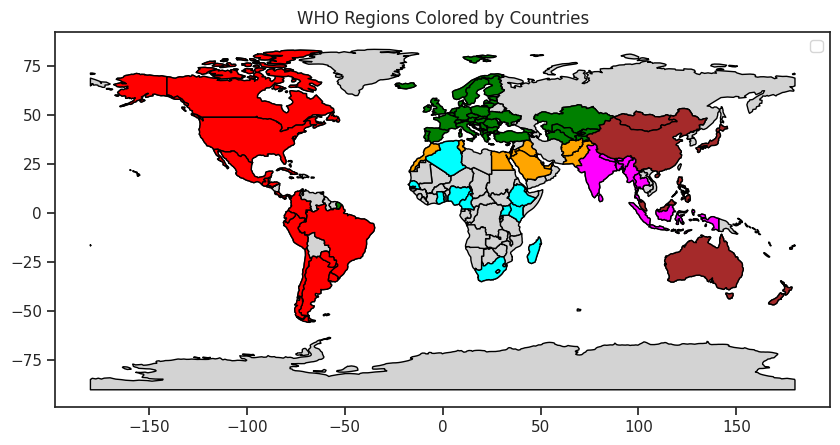

In [90]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming 'world' is a GeoDataFrame containing country boundaries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Define colors for each WHO Region
region_colors = {
    'African Region': 'cyan',
    'Eastern Mediterranean Region': 'orange',
    'European Region': 'green',
    'Region of the Americas': 'red',
    'South East Asia Region': 'magenta',
    'Western Pacific Region': 'brown'
}

# Plotting the map with WHO Regions colored
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plotting countries in each WHO Region with assigned colors
for region, color in region_colors.items():
    countries = region_countries_mapping.get(region, [])
    region_data = world[world['name'].isin(countries)]
    region_data.plot(ax=ax, color=color, edgecolor='black', label=region)

plt.title('WHO Regions Colored by Countries')
plt.legend()
plt.show()

# **1.3. Evolution of the Air Pollutants by Region and by Year**

In [91]:
All_WHO_Regions = df_Air_Pol.groupby(['WHO Region', 'Measurement Year']).mean()
All_WHO_Regions

<ipython-input-91-7825213e9803>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  All_WHO_Regions = df_Air_Pol.groupby(['WHO Region', 'Measurement Year']).mean()


PM2.5 (μg/m3)  PM10 (μg/m3)  \
WHO Region             Measurement Year                                
African Region         2010                      33.24         39.20   
                       2011                      39.66         47.98   
                       2012                      43.90         71.24   
                       2013                      34.96         69.72   
                       2014                      22.26         59.92   
...                                                ...           ...   
Western Pacific Region 2016                      42.56         32.73   
                       2017                      42.70         36.61   
                       2018                      39.75         39.94   
                       2019                      36.19         24.54   
                       2020                      18.00         32.53   

                                         NO2 (μg/m3)  
WHO Region             Measurement Year               
African Region         2010                    36.06  
                       2011                    22.25  
                       2012                    23.17  
                       2013                    30.74  
                       2014                    26.46  
...                                              ...  
Western Pacific Region 2016                    32.10  
                       2017                    31.01  
                       2018                    25.62  
                       2019                    18.14  
                       2020                    27.74  

[66 rows x 3 columns]

In [92]:
African_Region = df_Air_Pol[df_Air_Pol['WHO Region'] == 'African Region'].groupby(['WHO Region', 'Measurement Year']).mean()
African_Region

<ipython-input-92-c7e470f029ca>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  African_Region = df_Air_Pol[df_Air_Pol['WHO Region'] == 'African Region'].groupby(['WHO Region', 'Measurement Year']).mean()


PM2.5 (μg/m3)  PM10 (μg/m3)  NO2 (μg/m3)
WHO Region     Measurement Year                                          
African Region 2010                      33.24         39.20        36.06
               2011                      39.66         47.98        22.25
               2012                      43.90         71.24        23.17
               2013                      34.96         69.72        30.74
               2014                      22.26         59.92        26.46
               2015                      19.59         48.64        23.11
               2016                      26.87         46.27        28.73
               2017                      34.25         63.25        20.46
               2018                      26.31         46.06        28.85
               2019                      22.41         45.02        18.32
               2020                      23.26         40.99        16.48

<ipython-input-93-e358ce36157f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  African_Region = df_Air_Pol[df_Air_Pol['WHO Region'] == 'African Region'].groupby(['WHO Region', 'Measurement Year']).mean()


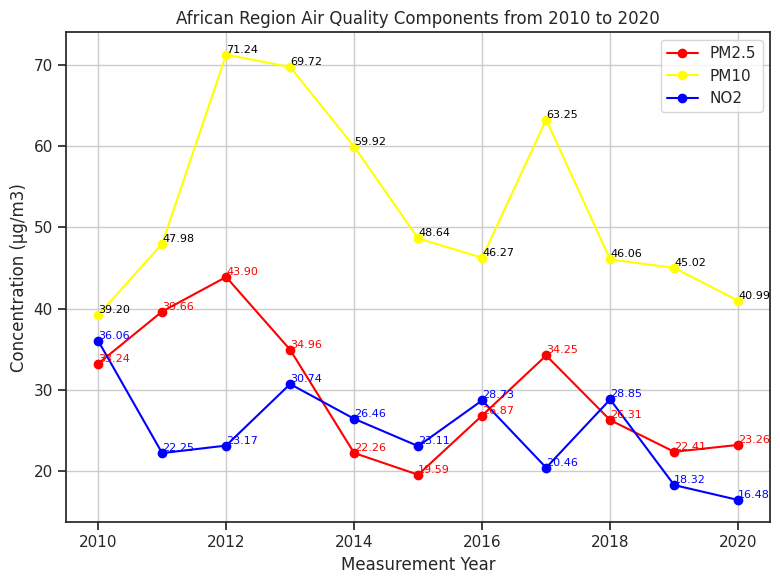

In [93]:
African_Region = df_Air_Pol[df_Air_Pol['WHO Region'] == 'African Region'].groupby(['WHO Region', 'Measurement Year']).mean()

# Plotting PM2.5, PM10, and NO2 for the African Region
plt.figure(figsize=(8, 6))
plt.plot(African_Region.index.get_level_values('Measurement Year'), African_Region['PM2.5 (μg/m3)'], marker='o', color='red', label='PM2.5')
plt.plot(African_Region.index.get_level_values('Measurement Year'), African_Region['PM10 (μg/m3)'], marker='o', color='yellow', label='PM10')
plt.plot(African_Region.index.get_level_values('Measurement Year'), African_Region['NO2 (μg/m3)'], marker='o', color='blue', label='NO2')

# Adding values at each point
for year, pm25, pm10, no2 in zip(African_Region.index.get_level_values('Measurement Year'), African_Region['PM2.5 (μg/m3)'], African_Region['PM10 (μg/m3)'], African_Region['NO2 (μg/m3)']):
    plt.text(year, pm25, f'{pm25:.2f}', ha='left', va='bottom', fontsize=8, color='red')
    plt.text(year, pm10, f'{pm10:.2f}', ha='left', va='bottom', fontsize=8, color='black')
    plt.text(year, no2, f'{no2:.2f}', ha='left', va='bottom', fontsize=8, color='blue')

plt.xlabel('Measurement Year')
plt.ylabel('Concentration (μg/m3)')
plt.title('African Region Air Quality Components from 2010 to 2020')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [94]:
Eastern_Mediterranean_Region = df_Air_Pol[df_Air_Pol['WHO Region'] == 'Eastern Mediterranean Region'].groupby(['WHO Region', 'Measurement Year']).mean()
Eastern_Mediterranean_Region

<ipython-input-94-c61cebb1c81c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Eastern_Mediterranean_Region = df_Air_Pol[df_Air_Pol['WHO Region'] == 'Eastern Mediterranean Region'].groupby(['WHO Region', 'Measurement Year']).mean()


PM2.5 (μg/m3)  PM10 (μg/m3)  \
WHO Region                   Measurement Year                                
Eastern Mediterranean Region 2010                      95.33        158.74   
                             2011                      50.49        124.16   
                             2012                      43.50        140.34   
                             2013                      43.64        105.14   
                             2014                      40.75        125.95   
                             2015                      46.38        139.00   
                             2016                      33.44         98.41   
                             2017                      53.25        119.01   
                             2018                      34.12        102.39   
                             2019                      37.70         91.68   
                             2020                      29.39         82.07   

                                               NO2 (μg/m3)  
WHO Region                   Measurement Year               
Eastern Mediterranean Region 2010                      NaN  
                             2011                    21.10  
                             2012                    61.23  
                             2013                    55.02  
                             2014                    53.63  
                             2015                    52.18  
                             2016                    63.76  
                             2017                    44.86  
                             2018                    33.71  
                             2019                    36.42  
                             2020                    33.84

<ipython-input-95-3fa639385161>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Eastern_Mediterranean_Region = df_Air_Pol[df_Air_Pol['WHO Region'] == 'Eastern Mediterranean Region'].groupby(['WHO Region', 'Measurement Year']).mean()


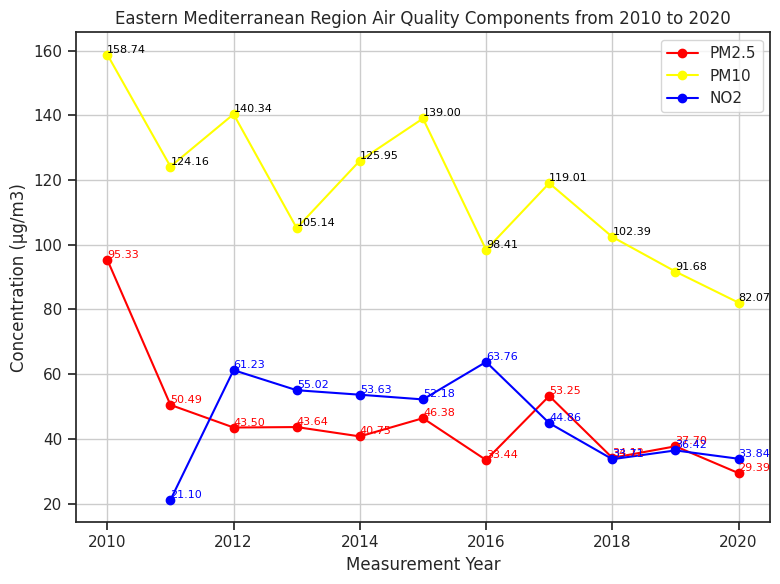

In [95]:
Eastern_Mediterranean_Region = df_Air_Pol[df_Air_Pol['WHO Region'] == 'Eastern Mediterranean Region'].groupby(['WHO Region', 'Measurement Year']).mean()

# Plotting PM2.5, PM10, and NO2 for the Eastern Mediterranean Region
plt.figure(figsize=(8, 6))
plt.plot(Eastern_Mediterranean_Region.index.get_level_values('Measurement Year'), Eastern_Mediterranean_Region['PM2.5 (μg/m3)'], marker='o', color='red', label='PM2.5')
plt.plot(Eastern_Mediterranean_Region.index.get_level_values('Measurement Year'), Eastern_Mediterranean_Region['PM10 (μg/m3)'], marker='o', color='yellow', label='PM10')
plt.plot(Eastern_Mediterranean_Region.index.get_level_values('Measurement Year'), Eastern_Mediterranean_Region['NO2 (μg/m3)'], marker='o', color='blue', label='NO2')

# Adding values at each point
for year, pm25, pm10, no2 in zip(Eastern_Mediterranean_Region.index.get_level_values('Measurement Year'), Eastern_Mediterranean_Region['PM2.5 (μg/m3)'], Eastern_Mediterranean_Region['PM10 (μg/m3)'], Eastern_Mediterranean_Region['NO2 (μg/m3)']):
    plt.text(year, pm25, f'{pm25:.2f}', ha='left', va='bottom', fontsize=8, color='red')
    plt.text(year, pm10, f'{pm10:.2f}', ha='left', va='bottom', fontsize=8, color='black')
    plt.text(year, no2, f'{no2:.2f}', ha='left', va='bottom', fontsize=8, color='blue')

plt.xlabel('Measurement Year')
plt.ylabel('Concentration (μg/m3)')
plt.title('Eastern Mediterranean Region Air Quality Components from 2010 to 2020')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [96]:
European_Region = df_Air_Pol[df_Air_Pol['WHO Region'] == 'European Region'].groupby(['WHO Region', 'Measurement Year']).mean()
European_Region

<ipython-input-96-28565d447bc6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  European_Region = df_Air_Pol[df_Air_Pol['WHO Region'] == 'European Region'].groupby(['WHO Region', 'Measurement Year']).mean()


PM2.5 (μg/m3)  PM10 (μg/m3)  NO2 (μg/m3)
WHO Region      Measurement Year                                          
European Region 2010                      17.17         27.64        23.17
                2011                      13.69         20.76        24.95
                2012                      17.31         22.72        24.32
                2013                      15.47         23.81        21.75
                2014                      14.54         22.58        20.42
                2015                      14.33         24.10        20.84
                2016                      13.41         21.90        20.28
                2017                      13.81         22.42        20.09
                2018                      13.62         22.43        18.98
                2019                      12.24         20.55        18.34
                2020                       9.08         12.73        16.98

<ipython-input-97-13ddaf0671f4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  European_Region = df_Air_Pol[df_Air_Pol['WHO Region'] == 'European Region'].groupby(['WHO Region', 'Measurement Year']).mean()


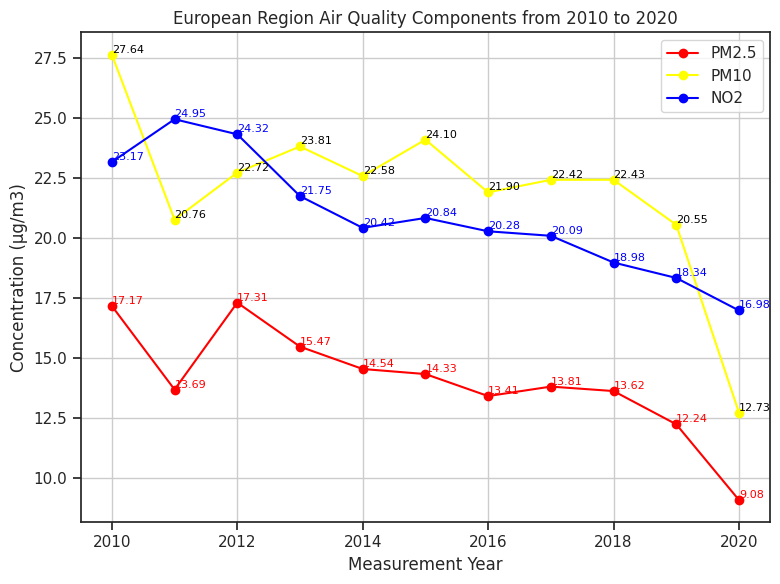

In [97]:
European_Region = df_Air_Pol[df_Air_Pol['WHO Region'] == 'European Region'].groupby(['WHO Region', 'Measurement Year']).mean()

# Plotting PM2.5, PM10, and NO2 for the European Region
plt.figure(figsize=(8, 6))
plt.plot(European_Region.index.get_level_values('Measurement Year'), European_Region['PM2.5 (μg/m3)'], marker='o', color='red', label='PM2.5')
plt.plot(European_Region.index.get_level_values('Measurement Year'), European_Region['PM10 (μg/m3)'], marker='o', color='yellow', label='PM10')
plt.plot(European_Region.index.get_level_values('Measurement Year'), European_Region['NO2 (μg/m3)'], marker='o', color='blue', label='NO2')

# Adding values at each point
for year, pm25, pm10, no2 in zip(European_Region.index.get_level_values('Measurement Year'), European_Region['PM2.5 (μg/m3)'], European_Region['PM10 (μg/m3)'], European_Region['NO2 (μg/m3)']):
    plt.text(year, pm25, f'{pm25:.2f}', ha='left', va='bottom', fontsize=8, color='red')
    plt.text(year, pm10, f'{pm10:.2f}', ha='left', va='bottom', fontsize=8, color='black')
    plt.text(year, no2, f'{no2:.2f}', ha='left', va='bottom', fontsize=8, color='blue')

plt.xlabel('Measurement Year')
plt.ylabel('Concentration (μg/m3)')
plt.title('European Region Air Quality Components from 2010 to 2020')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [98]:
Region_of_the_Americas = df_Air_Pol[df_Air_Pol['WHO Region'] == 'Region of the Americas'].groupby(['WHO Region', 'Measurement Year']).mean()
Region_of_the_Americas

<ipython-input-98-573ba42d2602>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Region_of_the_Americas = df_Air_Pol[df_Air_Pol['WHO Region'] == 'Region of the Americas'].groupby(['WHO Region', 'Measurement Year']).mean()


PM2.5 (μg/m3)  PM10 (μg/m3)  \
WHO Region             Measurement Year                                
Region of the Americas 2010                      14.07         32.36   
                       2011                      15.09         34.23   
                       2012                      14.75         32.60   
                       2013                      12.26         31.89   
                       2014                      16.75         34.11   
                       2015                      11.93         32.55   
                       2016                      10.43         30.85   
                       2017                       8.67         24.62   
                       2018                      10.17         26.92   
                       2019                       8.75         23.24   
                       2020                       3.20          3.65   

                                         NO2 (μg/m3)  
WHO Region             Measurement Year               
Region of the Americas 2010                    19.97  
                       2011                    19.58  
                       2012                    18.92  
                       2013                    18.25  
                       2014                    17.66  
                       2015                    14.90  
                       2016                    13.89  
                       2017                    12.11  
                       2018                    15.56  
                       2019                    12.60  
                       2020                      NaN

<ipython-input-99-5a85d991a3a8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Region_of_the_Americas = df_Air_Pol[df_Air_Pol['WHO Region'] == 'Region of the Americas'].groupby(['WHO Region', 'Measurement Year']).mean()


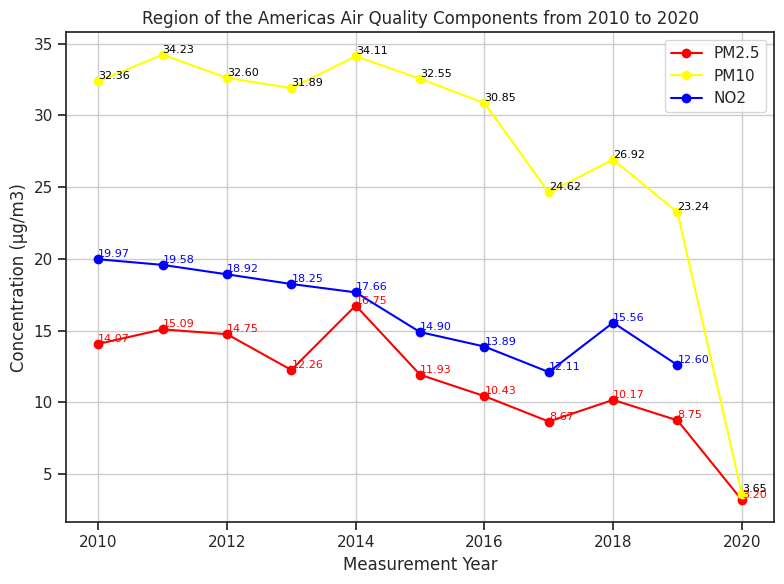

In [99]:
Region_of_the_Americas = df_Air_Pol[df_Air_Pol['WHO Region'] == 'Region of the Americas'].groupby(['WHO Region', 'Measurement Year']).mean()

# Plotting PM2.5, PM10, and NO2 for the Region of the Americas
plt.figure(figsize=(8, 6))
plt.plot(Region_of_the_Americas.index.get_level_values('Measurement Year'), Region_of_the_Americas['PM2.5 (μg/m3)'], marker='o', color='red', label='PM2.5')
plt.plot(Region_of_the_Americas.index.get_level_values('Measurement Year'), Region_of_the_Americas['PM10 (μg/m3)'], marker='o', color='yellow', label='PM10')
plt.plot(Region_of_the_Americas.index.get_level_values('Measurement Year'), Region_of_the_Americas['NO2 (μg/m3)'], marker='o', color='blue', label='NO2')

# Adding values at each point
for year, pm25, pm10, no2 in zip(Region_of_the_Americas.index.get_level_values('Measurement Year'), Region_of_the_Americas['PM2.5 (μg/m3)'], Region_of_the_Americas['PM10 (μg/m3)'], Region_of_the_Americas['NO2 (μg/m3)']):
    plt.text(year, pm25, f'{pm25:.2f}', ha='left', va='bottom', fontsize=8, color='red')
    plt.text(year, pm10, f'{pm10:.2f}', ha='left', va='bottom', fontsize=8, color='black')
    plt.text(year, no2, f'{no2:.2f}', ha='left', va='bottom', fontsize=8, color='blue')

plt.xlabel('Measurement Year')
plt.ylabel('Concentration (μg/m3)')
plt.title('Region of the Americas Air Quality Components from 2010 to 2020')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [100]:
South_East_Asia_Region = df_Air_Pol[df_Air_Pol['WHO Region'] == 'South East Asia Region'].groupby(['WHO Region', 'Measurement Year']).mean()
South_East_Asia_Region

<ipython-input-100-fb7f088f94bf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  South_East_Asia_Region = df_Air_Pol[df_Air_Pol['WHO Region'] == 'South East Asia Region'].groupby(['WHO Region', 'Measurement Year']).mean()


PM2.5 (μg/m3)  PM10 (μg/m3)  \
WHO Region             Measurement Year                                
South East Asia Region 2010                      92.65        148.12   
                       2011                      84.58         89.40   
                       2012                     100.97        119.31   
                       2013                      73.23        103.59   
                       2014                      70.48         71.22   
                       2015                      62.26        108.41   
                       2016                      41.57         93.58   
                       2017                      39.97         91.64   
                       2018                      44.59        101.54   
                       2019                      36.21         92.25   
                       2020                      36.59         50.00   

                                         NO2 (μg/m3)  
WHO Region             Measurement Year               
South East Asia Region 2010                    20.17  
                       2011                    20.54  
                       2012                    23.03  
                       2013                    21.05  
                       2014                    21.67  
                       2015                    31.26  
                       2016                    22.31  
                       2017                    22.86  
                       2018                    22.79  
                       2019                    22.44  
                       2020                      NaN

<ipython-input-101-cfb4490eca42>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  South_East_Asia_Region = df_Air_Pol[df_Air_Pol['WHO Region'] == 'South East Asia Region'].groupby(['WHO Region', 'Measurement Year']).mean()


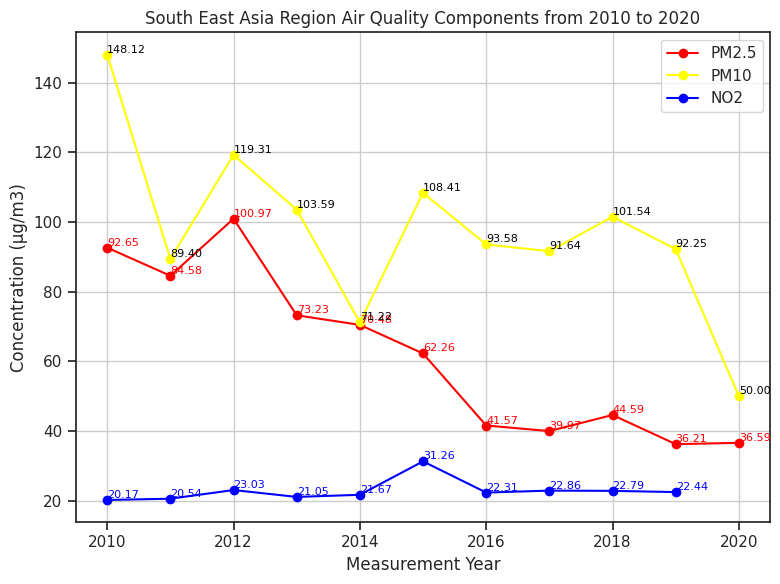

In [101]:
South_East_Asia_Region = df_Air_Pol[df_Air_Pol['WHO Region'] == 'South East Asia Region'].groupby(['WHO Region', 'Measurement Year']).mean()

# Plotting PM2.5, PM10, and NO2 for the South East Asia Region
plt.figure(figsize=(8, 6))
plt.plot(South_East_Asia_Region.index.get_level_values('Measurement Year'), South_East_Asia_Region['PM2.5 (μg/m3)'], marker='o', color='red', label='PM2.5')
plt.plot(South_East_Asia_Region.index.get_level_values('Measurement Year'), South_East_Asia_Region['PM10 (μg/m3)'], marker='o', color='yellow', label='PM10')
plt.plot(South_East_Asia_Region.index.get_level_values('Measurement Year'), South_East_Asia_Region['NO2 (μg/m3)'], marker='o', color='blue', label='NO2')

# Adding values at each point
for year, pm25, pm10, no2 in zip(South_East_Asia_Region.index.get_level_values('Measurement Year'), South_East_Asia_Region['PM2.5 (μg/m3)'], South_East_Asia_Region['PM10 (μg/m3)'], South_East_Asia_Region['NO2 (μg/m3)']):
    plt.text(year, pm25, f'{pm25:.2f}', ha='left', va='bottom', fontsize=8, color='red')
    plt.text(year, pm10, f'{pm10:.2f}', ha='left', va='bottom', fontsize=8, color='black')
    plt.text(year, no2, f'{no2:.2f}', ha='left', va='bottom', fontsize=8, color='blue')

plt.xlabel('Measurement Year')
plt.ylabel('Concentration (μg/m3)')
plt.title('South East Asia Region Air Quality Components from 2010 to 2020')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [102]:
Western_Pacific_Region = df_Air_Pol[df_Air_Pol['WHO Region'] == 'Western Pacific Region'].groupby(['WHO Region', 'Measurement Year']).mean()
Western_Pacific_Region

<ipython-input-102-43a0ef55e7a4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Western_Pacific_Region = df_Air_Pol[df_Air_Pol['WHO Region'] == 'Western Pacific Region'].groupby(['WHO Region', 'Measurement Year']).mean()


PM2.5 (μg/m3)  PM10 (μg/m3)  \
WHO Region             Measurement Year                                
Western Pacific Region 2010                      16.65         46.32   
                       2011                      33.45         46.40   
                       2012                      22.85         28.10   
                       2013                      32.00         40.17   
                       2014                      44.95         30.49   
                       2015                      46.25         33.31   
                       2016                      42.56         32.73   
                       2017                      42.70         36.61   
                       2018                      39.75         39.94   
                       2019                      36.19         24.54   
                       2020                      18.00         32.53   

                                         NO2 (μg/m3)  
WHO Region             Measurement Year               
Western Pacific Region 2010                    39.17  
                       2011                    39.00  
                       2012                    34.91  
                       2013                    36.39  
                       2014                    36.49  
                       2015                    33.11  
                       2016                    32.10  
                       2017                    31.01  
                       2018                    25.62  
                       2019                    18.14  
                       2020                    27.74

<ipython-input-103-4fc80896d60a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Western_Pacific_Region = df_Air_Pol[df_Air_Pol['WHO Region'] == 'Western Pacific Region'].groupby(['WHO Region', 'Measurement Year']).mean()


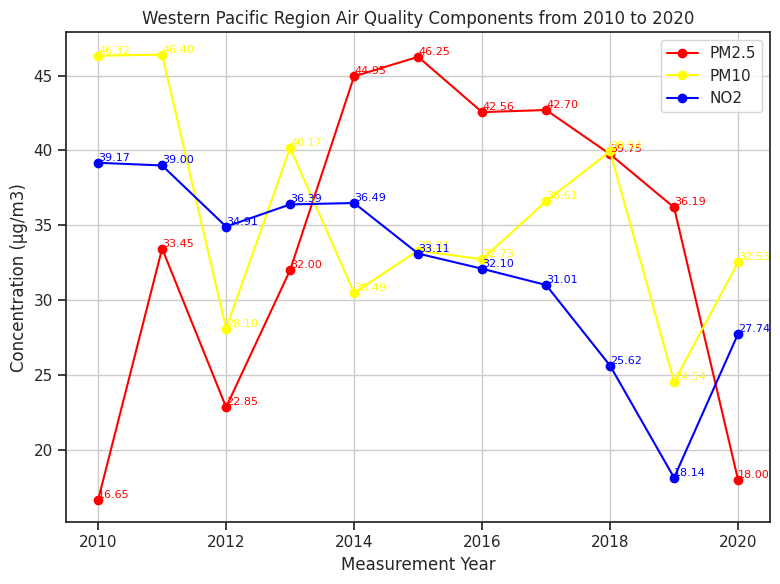

In [103]:
Western_Pacific_Region = df_Air_Pol[df_Air_Pol['WHO Region'] == 'Western Pacific Region'].groupby(['WHO Region', 'Measurement Year']).mean()

# Plotting PM2.5, PM10, and NO2 for the Western Pacific Region
plt.figure(figsize=(8, 6))
plt.plot(Western_Pacific_Region.index.get_level_values('Measurement Year'), Western_Pacific_Region['PM2.5 (μg/m3)'], marker='o', color='red', label='PM2.5')
plt.plot(Western_Pacific_Region.index.get_level_values('Measurement Year'), Western_Pacific_Region['PM10 (μg/m3)'], marker='o', color='yellow', label='PM10')
plt.plot(Western_Pacific_Region.index.get_level_values('Measurement Year'), Western_Pacific_Region['NO2 (μg/m3)'], marker='o', color='blue', label='NO2')

# Adding values at each point
for year, pm25, pm10, no2 in zip(Western_Pacific_Region.index.get_level_values('Measurement Year'), Western_Pacific_Region['PM2.5 (μg/m3)'], Western_Pacific_Region['PM10 (μg/m3)'], Western_Pacific_Region['NO2 (μg/m3)']):
    plt.text(year, pm25, f'{pm25:.2f}', ha='left', va='bottom', fontsize=8, color='red')
    plt.text(year, pm10, f'{pm10:.2f}', ha='left', va='bottom', fontsize=8, color='yellow')
    plt.text(year, no2, f'{no2:.2f}', ha='left', va='bottom', fontsize=8, color='blue')

plt.xlabel('Measurement Year')
plt.ylabel('Concentration (μg/m3)')
plt.title('Western Pacific Region Air Quality Components from 2010 to 2020')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **1.4. Plot the evolution of the 3 Pollutants **

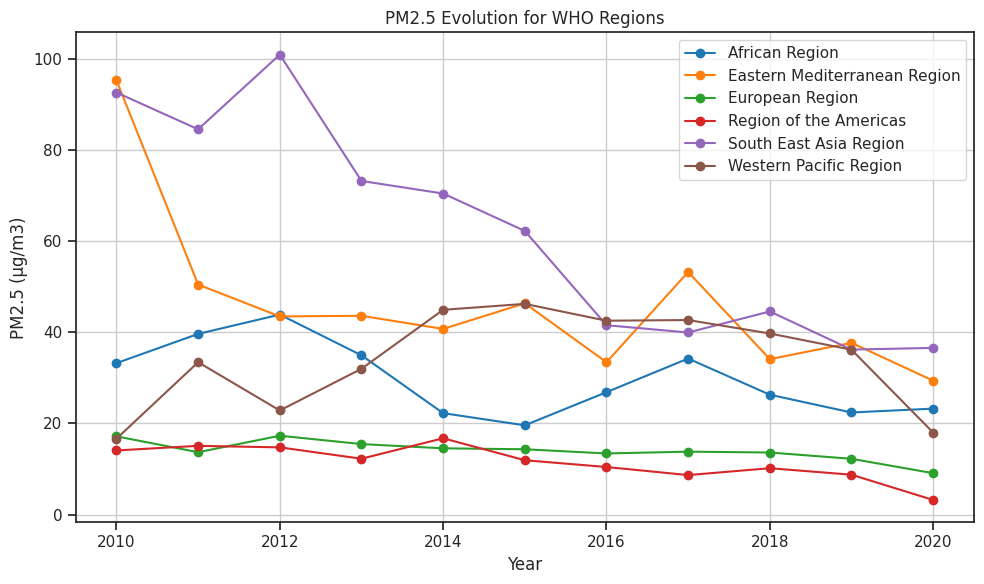

In [104]:
#Evolution of PM2.5 (μg/m3) for all 6 regions over the decade
regions_data = [
    African_Region,
    Eastern_Mediterranean_Region,
    European_Region,
    Region_of_the_Americas,
    South_East_Asia_Region,
    Western_Pacific_Region
]

region_names = [
    'African Region',
    'Eastern Mediterranean Region',
    'European Region',
    'Region of the Americas',
    'South East Asia Region',
    'Western Pacific Region'
]

plt.figure(figsize=(10, 6))

for data, region, color in zip(regions_data, region_names, plt.cm.tab10.colors):
    plt.plot(data.index.get_level_values('Measurement Year'), data['PM2.5 (μg/m3)'],
             marker='o', label=region, color=color)

plt.xlabel('Year')
plt.ylabel('PM2.5 (μg/m3)')
plt.title('PM2.5 Evolution for WHO Regions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

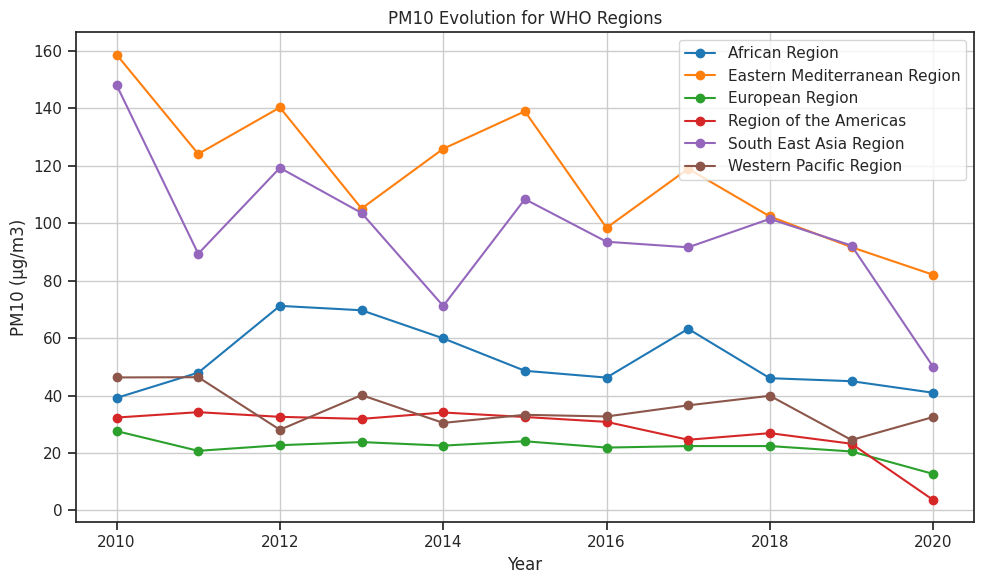

In [105]:
#Evolution of PM10 (μg/m3) for all 6 regions over the decade
regions_data_pm10 = [
    African_Region,
    Eastern_Mediterranean_Region,
    European_Region,
    Region_of_the_Americas,
    South_East_Asia_Region,
    Western_Pacific_Region
]

region_names = [
    'African Region',
    'Eastern Mediterranean Region',
    'European Region',
    'Region of the Americas',
    'South East Asia Region',
    'Western Pacific Region'
]

plt.figure(figsize=(10, 6))

for data, region, color in zip(regions_data_pm10, region_names, plt.cm.tab10.colors):
    plt.plot(data.index.get_level_values('Measurement Year'), data['PM10 (μg/m3)'],
             marker='o', label=region, color=color)

plt.xlabel('Year')
plt.ylabel('PM10 (μg/m3)')
plt.title('PM10 Evolution for WHO Regions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

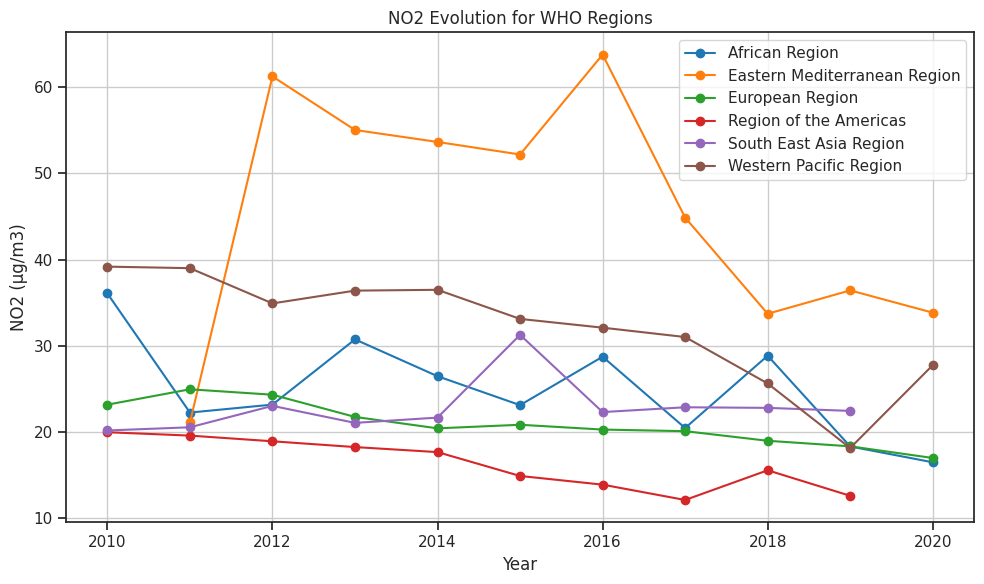

In [106]:
#Evolution of NO2 (μg/m3) for all 6 regions over the decade
regions_data_no2 = [
    African_Region,
    Eastern_Mediterranean_Region,
    European_Region,
    Region_of_the_Americas,
    South_East_Asia_Region,
    Western_Pacific_Region
]

region_names = [
    'African Region',
    'Eastern Mediterranean Region',
    'European Region',
    'Region of the Americas',
    'South East Asia Region',
    'Western Pacific Region'
]

plt.figure(figsize=(10, 6))

for data, region, color in zip(regions_data_no2, region_names, plt.cm.tab10.colors):
    plt.plot(data.index.get_level_values('Measurement Year'), data['NO2 (μg/m3)'],
             marker='o', label=region, color=color)

plt.xlabel('Year')
plt.ylabel('NO2 (μg/m3)')
plt.title('NO2 Evolution for WHO Regions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

................................................FOCUS ON THE US....................................................................................................................

In [107]:
#From the dataset Air pollution, Now I want to focus only on the values associated with USA"
df_Air_Pol= pd.read_excel(path)

df_USA = df_Air_Pol[df_Air_Pol['WHO Country Name'] == 'United States of America']
df_USA

,WHO Region,ISO3,WHO Country Name,City or Locality,State,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3)
2505,Region of the Americas,USA,United States of America,Albany-Schenectady-Troy (Ny),NY,2010,7.90,NaN,NaN
2506,Region of the Americas,USA,United States of America,Albuquerque (Nm),NM,2010,NaN,23.40,NaN
2507,Region of the Americas,USA,United States of America,Allentown-Bethlehem-Easton (Pa-Nj),NJ,2010,NaN,NaN,20.10
2508,Region of the Americas,USA,United States of America,Anchorage (Ak),AK,2010,5.55,15.25,NaN
2509,Region of the Americas,USA,United States of America,Athens-Clarke County (Ga),GA,2010,11.30,NaN,NaN
...,...,...,...,...,...,...,...,...,...
30493,Region of the Americas,USA,United States of America,Wichita (Ks),KS,2019,NaN,21.20,5.90
30494,Region of the Americas,USA,United States of America,Worcester (Ma-Ct),CT,2019,NaN,NaN,19.70
30495,Region of the Americas,USA,United States of America,Yreka (CA),CA,2019,5.90,NaN,NaN
30496,Region of the Americas,USA,United States of America,Yuba City (Ca),CA,2019,NaN,NaN,12.20


In [108]:
df_USA. describe()

,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3)
count,1776.00,662.00,1044.00,933.00
mean,2014.44,8.84,19.93,14.66
std,2.87,3.58,8.66,8.18
min,2010.00,1.80,3.80,0.50
25%,2012.00,6.00,13.52,8.20
50%,2014.00,8.60,18.80,14.00
75%,2017.00,11.19,24.76,20.19
max,2019.00,20.40,65.30,41.10


In [109]:
# Grouping by 'WHO Country Name' and 'Measurement Year' and calculating the mean value
USA_Air_Pollutants_State = df_USA.groupby(['WHO Country Name', 'Measurement Year', 'State']).mean()
USA_Air_Pollutants_State

<ipython-input-109-8140cf86adec>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  USA_Air_Pollutants_State = df_USA.groupby(['WHO Country Name', 'Measurement Year', 'State']).mean()


PM2.5 (μg/m3)  PM10 (μg/m3)  \
WHO Country Name         Measurement Year State                                
United States of America 2010             AK              9.05         12.12   
                                          AL             11.53         21.73   
                                          AR             12.30         20.50   
                                          AZ              6.61         33.54   
                                          CA              9.87         22.20   
...                                                        ...           ...   
                         2019             VT              4.50          4.90   
                                          WA               NaN           NaN   
                                          WI              5.40         22.28   
                                          WV               NaN          7.60   
                                          WY               NaN         10.06   

                                                 NO2 (μg/m3)  
WHO Country Name         Measurement Year State               
United States of America 2010             AK             NaN  
                                          AL             NaN  
                                          AR           19.30  
                                          AZ           24.69  
                                          CA           15.92  
...                                                      ...  
                         2019             VT             NaN  
                                          WA           14.50  
                                          WI           21.98  
                                          WV           21.20  
                                          WY            1.40  

[455 rows x 3 columns]

In [110]:
# Grouping by 'WHO Country Name' and 'Measurement Year' and calculating the mean value
USA_Air_Pollutants = df_USA.groupby(['WHO Country Name', 'Measurement Year']).mean()
USA_Air_Pollutants

<ipython-input-110-0bab426e094b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  USA_Air_Pollutants = df_USA.groupby(['WHO Country Name', 'Measurement Year']).mean()


PM2.5 (μg/m3)  PM10 (μg/m3)  \
WHO Country Name         Measurement Year                                
United States of America 2010                       9.75         21.17   
                         2011                       9.63         20.51   
                         2012                       9.30         21.18   
                         2013                       9.21         20.36   
                         2014                       8.78         19.86   
                         2015                       8.94         19.91   
                         2016                       7.53         18.94   
                         2017                       8.80         19.09   
                         2018                       8.86         19.70   
                         2019                       7.32         18.63   

                                           NO2 (μg/m3)  
WHO Country Name         Measurement Year               
United States of America 2010                    17.39  
                         2011                    16.90  
                         2012                    15.44  
                         2013                    15.02  
                         2014                    14.70  
                         2015                    14.43  
                         2016                    13.33  
                         2017                    13.01  
                         2018                    12.95  
                         2019                    12.86

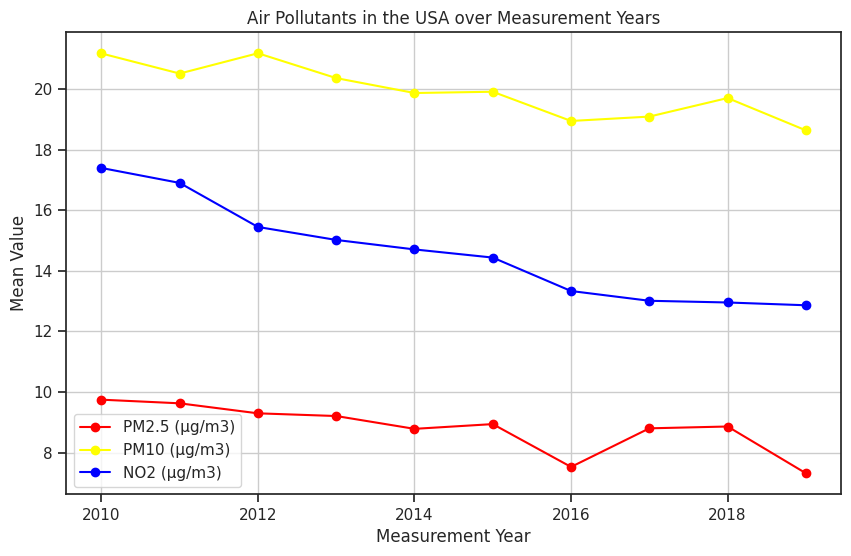

In [111]:

plt.figure(figsize=(10, 6))

# Extracting data for each pollutant
pm25_data = USA_Air_Pollutants['PM2.5 (μg/m3)']
pm10_data = USA_Air_Pollutants['PM10 (μg/m3)']
no2_data = USA_Air_Pollutants['NO2 (μg/m3)']
years = USA_Air_Pollutants.index.get_level_values('Measurement Year')

# Plotting each pollutant with specific colors and markers
plt.plot(years, pm25_data, color='red', marker='o', linestyle='-', label='PM2.5 (μg/m3)')
plt.plot(years, pm10_data, color='yellow', marker='o', linestyle='-', label='PM10 (μg/m3)')
plt.plot(years, no2_data, color='blue', marker='o', linestyle='-', label='NO2 (μg/m3)')

plt.title('Air Pollutants in the USA over Measurement Years')
plt.xlabel('Measurement Year')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)
plt.show()


In [112]:
# From the dataset Air pollution, and focusing only on the USA, we want to group the pollutants by State and Year"
State_Year_Pollutants= df_USA.groupby(['State', 'Measurement Year']).mean()
State_Year_Pollutants

<ipython-input-112-d8dff4c989ab>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  State_Year_Pollutants= df_USA.groupby(['State', 'Measurement Year']).mean()


PM2.5 (μg/m3)  PM10 (μg/m3)  NO2 (μg/m3)
State Measurement Year                                          
AK    2010                       9.05         12.12          NaN
      2011                       7.53         12.89          NaN
      2012                       7.73         14.63          NaN
      2013                       7.53         14.45          NaN
      2014                       7.83         16.70          NaN
...                               ...           ...          ...
WY    2015                        NaN         10.02         3.30
      2016                       3.90         10.22         1.60
      2017                       3.40         11.33         3.78
      2018                       4.70         16.28         4.11
      2019                        NaN         10.06         1.40

[455 rows x 3 columns]

In [113]:
# Finding the state names and their highest 'PM2.5 (μg/m3)' values per year
highest_pm25_states = State_Year_Pollutants.loc[State_Year_Pollutants.groupby('Measurement Year')['PM2.5 (μg/m3)'].idxmax()]
print(highest_pm25_states[['PM2.5 (μg/m3)']])

                        PM2.5 (μg/m3)
State Measurement Year               
PA    2010                      16.00
      2011                      13.85
      2012                      14.25
OR    2013                      13.60
PA    2014                      13.40
OH    2015                      12.10
PA    2016                      11.80
OR    2017                      13.28
      2018                      15.40
MI    2019                      11.00


In [114]:
# Finding the state names and their lowest 'PM2.5 (μg/m3)' values per year
lowest_pm25_states = State_Year_Pollutants.loc[State_Year_Pollutants.groupby('Measurement Year')['PM2.5 (μg/m3)'].idxmin()]
print(lowest_pm25_states[['PM2.5 (μg/m3)']])

                        PM2.5 (μg/m3)
State Measurement Year               
NV    2010                       3.40
MT    2011                       3.80
MI    2012                       4.10
SD    2013                       3.10
      2014                       2.40
VT    2015                       3.50
SD    2016                       1.90
HI    2017                       3.23
      2018                       3.45
NV    2019                       3.00


In [115]:
# Finding the state names and their highest 'PM10 (μg/m3)' values per ye
highest_pm10_states = State_Year_Pollutants.loc[State_Year_Pollutants.groupby('Measurement Year')['PM10 (μg/m3)'].idxmax()]
print(highest_pm10_states[['PM10 (μg/m3)']])

                        PM10 (μg/m3)
State Measurement Year              
IL    2010                     42.90
      2011                     41.80
      2012                     45.15
SD    2013                     37.70
IL    2014                     42.90
MD    2015                     37.40
      2016                     39.00
NM    2017                     32.00
      2018                     34.20
IN    2019                     33.15


In [116]:
# Finding the state names and their lowest 'PM10 (μg/m3)' values per ye
lowest_pm10_states = State_Year_Pollutants.loc[State_Year_Pollutants.groupby('Measurement Year')['PM10 (μg/m3)'].idxmin()]
print(lowest_pm10_states[['PM10 (μg/m3)']])

                        PM10 (μg/m3)
State Measurement Year              
VT    2010                      7.40
ND    2011                      7.60
VT    2012                      6.80
      2013                      6.60
ND    2014                      5.90
      2015                      5.90
      2016                      3.80
VT    2017                      5.90
MA    2018                      5.10
VT    2019                      4.90


In [117]:
# Finding the state names and their highest 'NO2 (μg/m3)' values per ye
highest_n02_states = State_Year_Pollutants.loc[State_Year_Pollutants.groupby('Measurement Year')['NO2 (μg/m3)'].idxmax()]
print(highest_n02_states[['NO2 (μg/m3)']])

                        NO2 (μg/m3)
State Measurement Year             
OH    2010                    29.70
NV    2011                    28.05
AZ    2012                    27.56
UT    2013                    25.87
NH    2014                    30.95
MI    2015                    27.65
NV    2016                    30.20
      2017                    31.70
CT    2018                    23.10
WI    2019                    21.98


In [118]:
# Finding the state names and their lowest 'NO2 (μg/m3)' values per ye
lowest_n02_states = State_Year_Pollutants.loc[State_Year_Pollutants.groupby('Measurement Year')['NO2 (μg/m3)'].idxmin()]
print(lowest_n02_states[['NO2 (μg/m3)']])

                        NO2 (μg/m3)
State Measurement Year             
ND    2010                     2.20
      2011                     3.92
MT    2012                     3.10
      2013                     2.55
      2014                     2.50
      2015                     1.70
WY    2016                     1.60
MT    2017                     1.30
      2018                     1.70
WY    2019                     1.40


### **PART 2**

# ***We will be working only with the Chronic Respiratory Disease Dataste***

In [119]:
#Lets imput a NEW DATASET with the Respiratory Diseases of the USA

path="/content/drive/MyDrive/MSSP607/d. project/Project #4 Individual /Combo/Chronic Respiratory Disease (short-combo) xlx.xlsx"
df_Chro_Res_Dis= pd.read_excel(path)       #df is the new name for dataset
df_Chro_Res_Dis.head()

,measure_name,location_name,sex_name,age_name,cause_name,Measurement Year,Value
0,Deaths,Arizona,Male,90-94,Chronic respiratory diseases,2010,134.06
1,Deaths,Arizona,Female,90-94,Chronic respiratory diseases,2010,186.70
2,Deaths,Arizona,Male,<20 years,Chronic respiratory diseases,2010,5.71
3,Deaths,Arizona,Female,<20 years,Chronic respiratory diseases,2010,4.03
4,Deaths,Arizona,Male,95+ years,Chronic respiratory diseases,2010,67.86


In [120]:
#I want to create a new column with the abbreviations of the States based on the "location_name" variable
# Dictionary containing state abbreviations for all states in the USA
state_mapping = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# Assuming 'df_Res_Dis' contains your dataset
df_Chro_Res_Dis['State'] = df_Chro_Res_Dis['location_name'].map(state_mapping)
df_Chro_Res_Dis

,measure_name,location_name,sex_name,age_name,cause_name,Measurement Year,Value,State
0,Deaths,Arizona,Male,90-94,Chronic respiratory diseases,2010,134.06,AZ
1,Deaths,Arizona,Female,90-94,Chronic respiratory diseases,2010,186.70,AZ
2,Deaths,Arizona,Male,<20 years,Chronic respiratory diseases,2010,5.71,AZ
3,Deaths,Arizona,Female,<20 years,Chronic respiratory diseases,2010,4.03,AZ
4,Deaths,Arizona,Male,95+ years,Chronic respiratory diseases,2010,67.86,AZ
...,...,...,...,...,...,...,...,...
5195,Deaths,Florida,Female,95+ years,Chronic respiratory diseases,2019,767.04,FL
5196,Deaths,Florida,Male,20-54 years,Chronic respiratory diseases,2019,239.22,FL
5197,Deaths,Florida,Female,20-54 years,Chronic respiratory diseases,2019,237.45,FL
5198,Deaths,Florida,Male,55-89 years,Chronic respiratory diseases,2019,6788.84,FL


## **2.1. Descriptive Analytics**

In [121]:
# Count the number of entries for each gender
gender_counts = df_Chro_Res_Dis['sex_name'].value_counts()

print("Number of Entries for Each Gender:")
print(gender_counts)

Number of Entries for Each Gender:
Male      2600
Female    2600
Name: sex_name, dtype: int64


In [122]:
df_Chro_Res_Dis.groupby('sex_name')['Value'].mean()

sex_name
Female   799.48
Male     761.32
Name: Value, dtype: float64

In [123]:
df_Chro_Res_Dis.groupby('age_name')['Value'].mean()

age_name
20-54 years    148.47
55-89 years   3181.65
90-94          372.15
95+ years      192.48
<20 years        7.25
Name: Value, dtype: float64

# **2.2. Compare the age and sex groups and use visualizations**

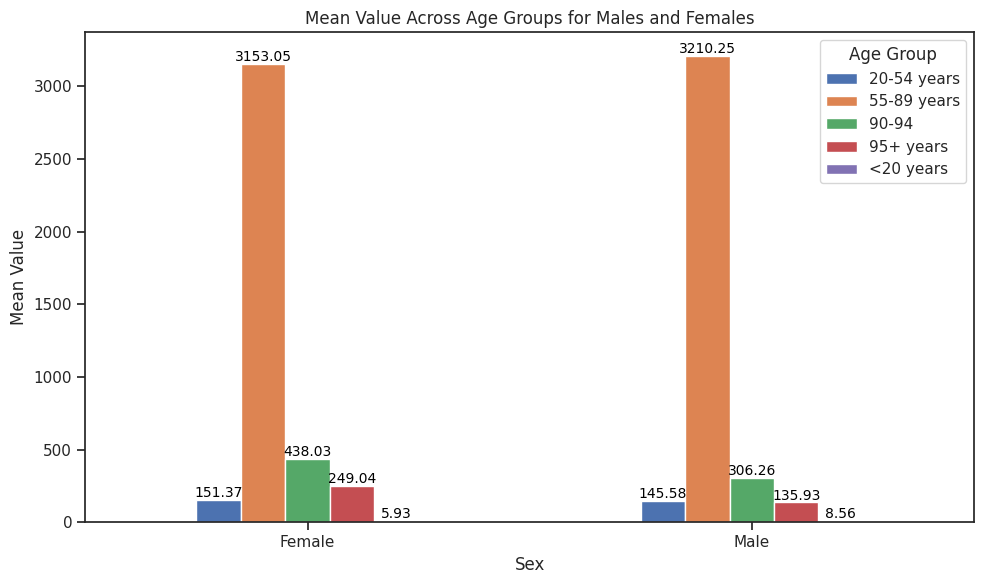

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into df_Chro_Res_Dis

# Create a pivot table to compare age and sex groups using the 'Value' column
pivot_data = df_Chro_Res_Dis.pivot_table(index='sex_name', columns='age_name', values='Value', aggfunc='mean')

# Plotting mean values across age groups for males and females
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data.plot(kind='bar', ax=ax)

# Adding values to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.set_title('Mean Value Across Age Groups for Males and Females')
ax.set_xlabel('Sex')
ax.set_ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()


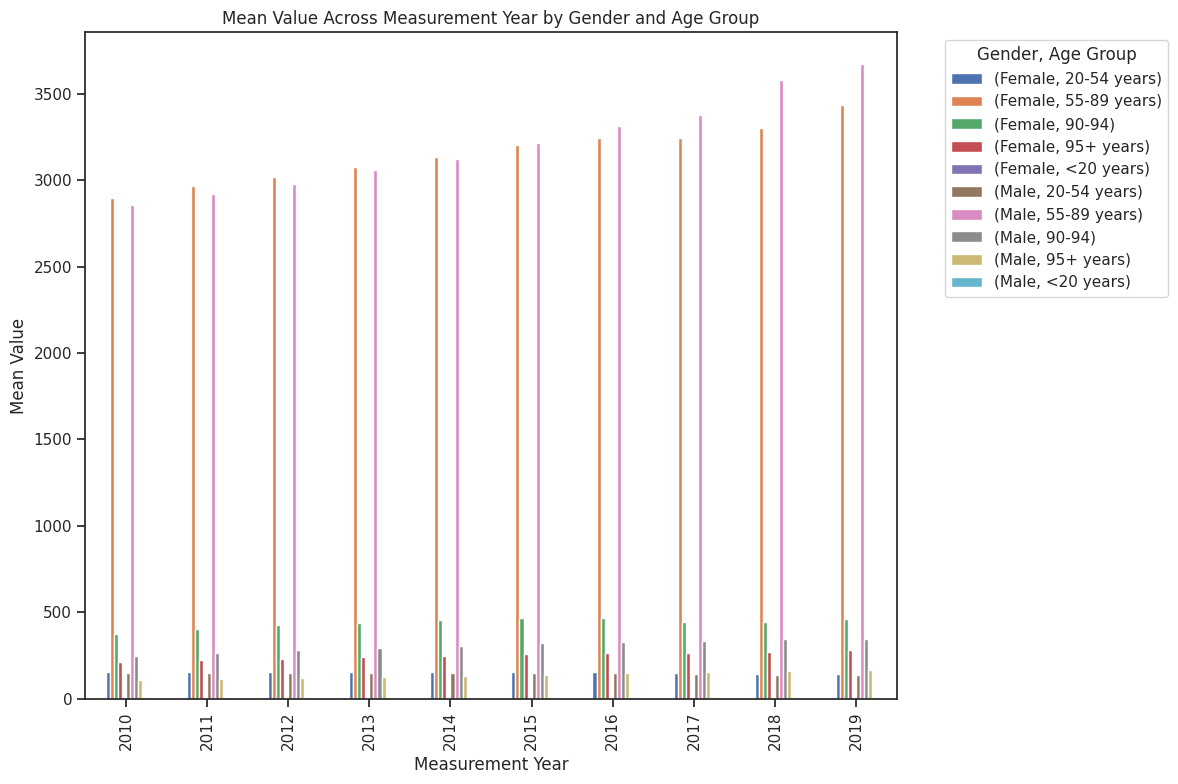

In [125]:
# Convert the 'Value' column to numeric if needed
df_Chro_Res_Dis['Value'] = pd.to_numeric(df_Chro_Res_Dis['Value'], errors='coerce')

# Grouping by 'Measurement Year', 'sex_name', and 'age_name'
sex_group = df_Chro_Res_Dis.groupby(['Measurement Year', 'sex_name', 'age_name'])

# Calculating the mean of 'Value' for each group
mean_measurement = sex_group['Value'].mean().reset_index()

# Pivot the data for plotting
pivot_data = mean_measurement.pivot_table(index='Measurement Year', columns=['sex_name', 'age_name'], values='Value')

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))
pivot_data.plot(kind='bar', ax=ax)
plt.title('Mean Value Across Measurement Year by Gender and Age Group')
plt.xlabel('Measurement Year')
plt.ylabel('Mean Value')
plt.legend(title='Gender, Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

  sex_name     age_name   Value
0   Female  20-54 years  151.37
1   Female  55-89 years 3153.05
2   Female        90-94  438.03
3   Female    95+ years  249.04
4   Female    <20 years    5.93
5     Male  20-54 years  145.58
6     Male  55-89 years 3210.25
7     Male        90-94  306.26
8     Male    95+ years  135.93
9     Male    <20 years    8.56


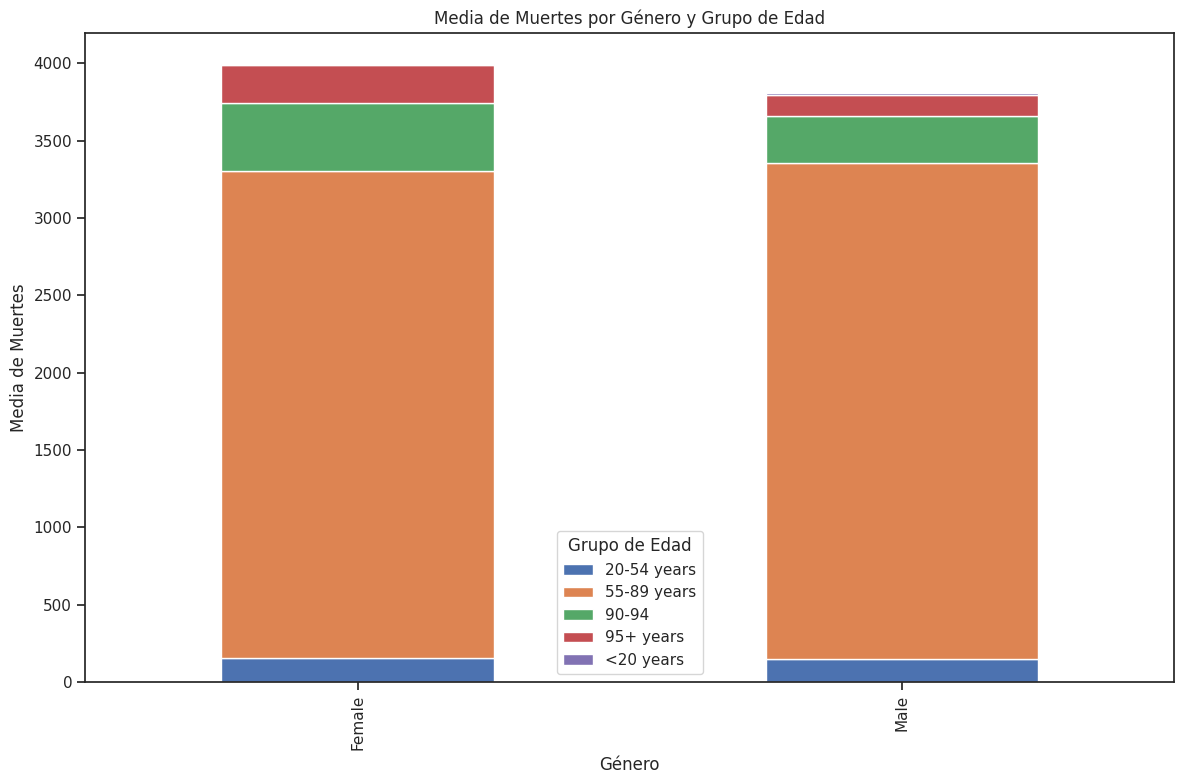

In [126]:
import pandas as pd

# Supongamos que ya tienes el DataFrame df_Chro_Res_Dis con la columna 'Value'

# Convertir la columna 'Value' a numérica si es necesario
df_Chro_Res_Dis['Value'] = pd.to_numeric(df_Chro_Res_Dis['Value'], errors='coerce')

# Group by 'sex_name' y 'age_name' y calcular la media
mean_deaths = df_Chro_Res_Dis.groupby(['sex_name', 'age_name'])['Value'].mean().reset_index()

print(mean_deaths)

import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que ya tienes el DataFrame mean_deaths con la media de muertes por género y grupo de edad

# Crear un gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 8))

# Extraer los datos
sex_age_groups = mean_deaths.groupby(['sex_name', 'age_name'])['Value'].mean().unstack()

# Generar el gráfico de barras apiladas
sex_age_groups.plot(kind='bar', stacked=True, ax=ax)

# Configurar etiquetas y título
plt.title('Media de Muertes por Género y Grupo de Edad')
plt.xlabel('Género')
plt.ylabel('Media de Muertes')
plt.legend(title='Grupo de Edad')

# Mostrar el gráfico
plt.tight_layout()
plt.show()



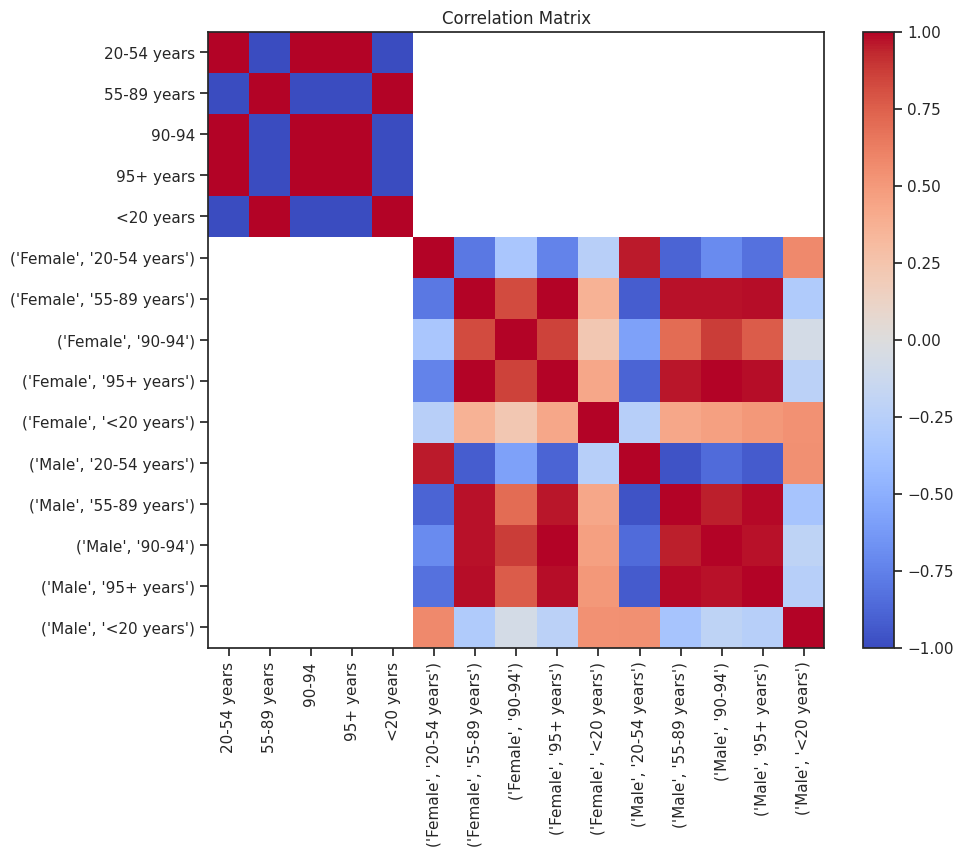

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into df_Chro_Res_Dis

# Create a pivot table to compare age and sex groups using the 'Value' column
pivot_data_age_sex = df_Chro_Res_Dis.pivot_table(index='sex_name', columns='age_name', values='Value', aggfunc='mean')

# Convert the 'Value' column to numeric if needed
df_Chro_Res_Dis['Value'] = pd.to_numeric(df_Chro_Res_Dis['Value'], errors='coerce')

# Grouping by 'Measurement Year', 'sex_name', and 'age_name'
sex_group = df_Chro_Res_Dis.groupby(['Measurement Year', 'sex_name', 'age_name'])

# Calculating the mean of 'Value' for each group
mean_measurement = sex_group['Value'].mean().reset_index()

# Pivot the data for plotting
pivot_data_measurement = mean_measurement.pivot_table(index='Measurement Year', columns=['sex_name', 'age_name'], values='Value')

# Concatenate the two pivot tables vertically to include both age/sex and measurement year
pivot_data_combined = pd.concat([pivot_data_age_sex, pivot_data_measurement])

# Create a correlation matrix
correlation_matrix = pivot_data_combined.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()


....................................................................................................................................................................

# ***Preparing the second dataset (Chronic Respiratory Disease) for later be able to merge with the first dataset (Air Quality Pollution)***

In [128]:
# Combining Male and Female values for 'sex_name'
combined_sex_values = df_Chro_Res_Dis.copy()  # Creating a copy to preserve original data
combined_sex_values['sex_name'] = 'Combined'  # Changing sex_name to 'Combined' for both Male and Female
combined_sex_values = combined_sex_values.groupby(['measure_name', 'location_name', 'sex_name', 'age_name', 'cause_name', 'Measurement Year', 'State']).sum().reset_index()
combined_sex_values

,measure_name,location_name,sex_name,age_name,cause_name,Measurement Year,State,Value
0,Deaths,Alabama,Combined,20-54 years,Chronic respiratory diseases,2010,AL,224.21
1,Deaths,Alabama,Combined,20-54 years,Chronic respiratory diseases,2011,AL,225.31
2,Deaths,Alabama,Combined,20-54 years,Chronic respiratory diseases,2012,AL,227.55
3,Deaths,Alabama,Combined,20-54 years,Chronic respiratory diseases,2013,AL,228.97
4,Deaths,Alabama,Combined,20-54 years,Chronic respiratory diseases,2014,AL,225.12
...,...,...,...,...,...,...,...,...
2495,Deaths,Wyoming,Combined,<20 years,Chronic respiratory diseases,2015,WY,1.06
2496,Deaths,Wyoming,Combined,<20 years,Chronic respiratory diseases,2016,WY,1.05
2497,Deaths,Wyoming,Combined,<20 years,Chronic respiratory diseases,2017,WY,1.03
2498,Deaths,Wyoming,Combined,<20 years,Chronic respiratory diseases,2018,WY,1.05


In [129]:
# Combining All ages data for 'age_name'
combined_sex_age_values = df_Chro_Res_Dis.copy()  # Creating a copy to preserve original data
combined_sex_age_values['sex_name'] = 'Combined'  # Changing sex_name to 'Combined' for both Male and Female
combined_sex_age_values['age_name'] = 'Combined'  # Changing age_name to 'Combined' for all age groups
combined_sex_age_values = combined_sex_age_values.groupby(['measure_name', 'location_name', 'sex_name', 'age_name', 'cause_name', 'Measurement Year', 'State']).sum().reset_index()
combined_sex_age_values

,measure_name,location_name,sex_name,age_name,cause_name,Measurement Year,State,Value
0,Deaths,Alabama,Combined,Combined,Chronic respiratory diseases,2010,AL,4117.62
1,Deaths,Alabama,Combined,Combined,Chronic respiratory diseases,2011,AL,4206.21
2,Deaths,Alabama,Combined,Combined,Chronic respiratory diseases,2012,AL,4347.53
3,Deaths,Alabama,Combined,Combined,Chronic respiratory diseases,2013,AL,4468.55
4,Deaths,Alabama,Combined,Combined,Chronic respiratory diseases,2014,AL,4527.52
...,...,...,...,...,...,...,...,...
495,Deaths,Wyoming,Combined,Combined,Chronic respiratory diseases,2015,WY,467.22
496,Deaths,Wyoming,Combined,Combined,Chronic respiratory diseases,2016,WY,466.01
497,Deaths,Wyoming,Combined,Combined,Chronic respiratory diseases,2017,WY,481.12
498,Deaths,Wyoming,Combined,Combined,Chronic respiratory diseases,2018,WY,500.23


## **EDA**

<ipython-input-130-d71e3c2c7816>:7: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_Air_Pol.fillna(df_Air_Pol.median(), inplace=True)


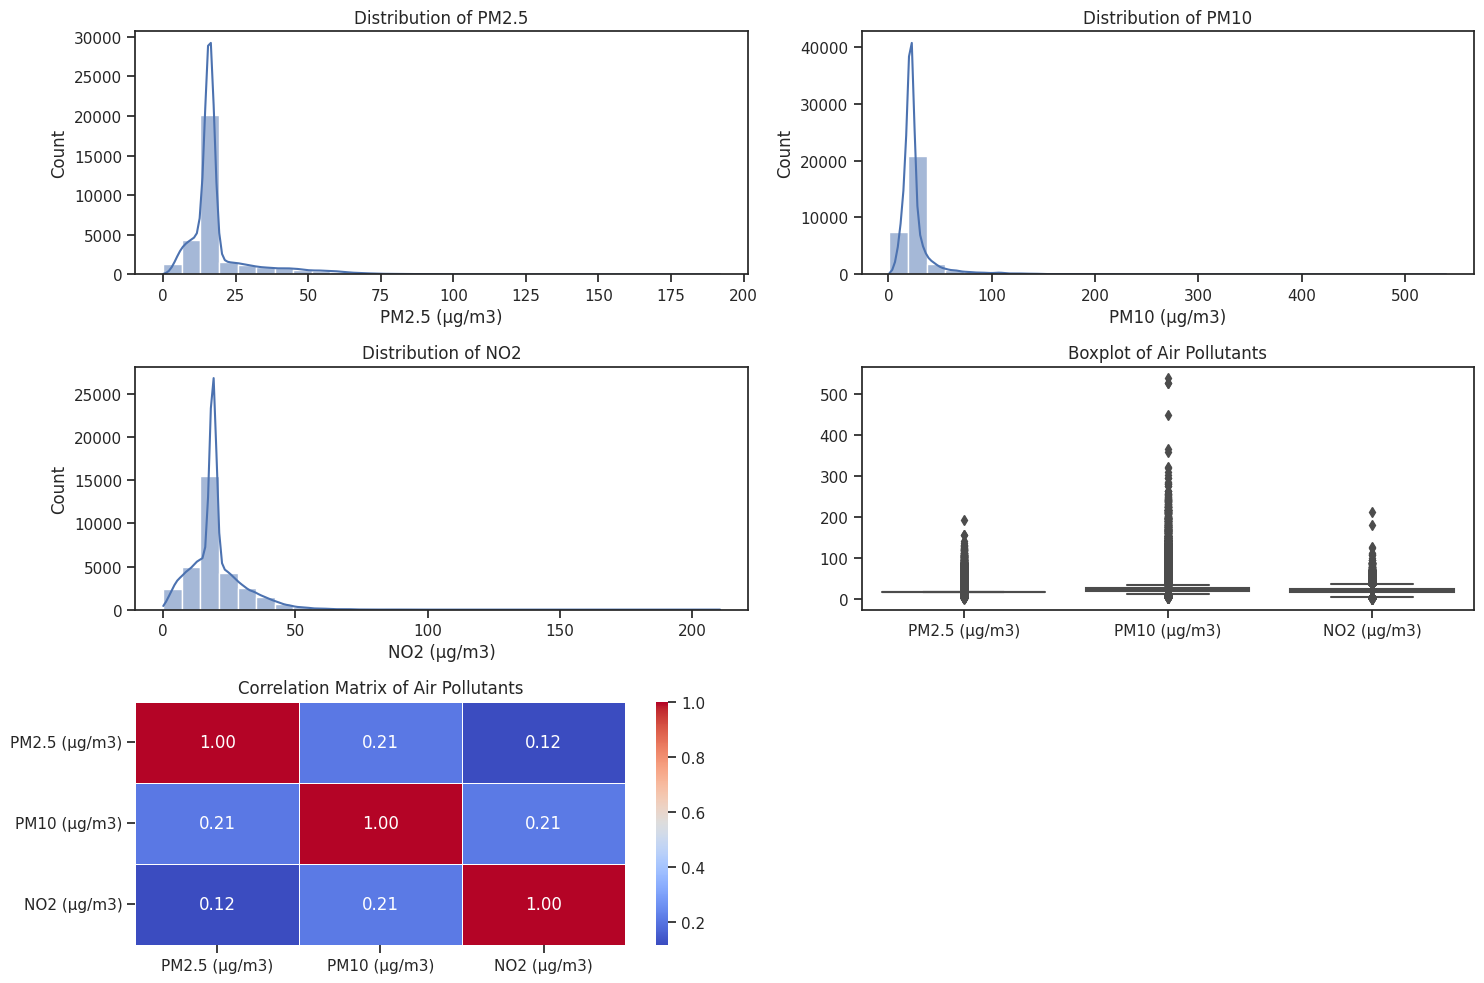

T-Test Result between PM2.5 and PM10: TtestResult(statistic=-54.88481206840315, pvalue=0.0, df=64302.0)
T-Test Result between PM2.5 and NO2: TtestResult(statistic=-9.072219635774477, pvalue=1.1980238985476555e-19, df=64302.0)
T-Test Result between PM10 and NO2: TtestResult(statistic=51.58414984774626, pvalue=0.0, df=64302.0)


In [130]:
from scipy.stats import zscore, ttest_ind
# Handle outliers using z-score (replace values beyond 3 standard deviations)
z_scores_air_quality = zscore(df_Air_Pol[['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']])
df_Air_Pol[(z_scores_air_quality < -3) | (z_scores_air_quality > 3)] = np.nan

# Impute missing values (replace NaN with mean or median)
df_Air_Pol.fillna(df_Air_Pol.median(), inplace=True)

# Visualize the distribution of each air pollutant
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
sns.histplot(df_Air_Pol['PM2.5 (μg/m3)'], bins=30, kde=True)
plt.title('Distribution of PM2.5')

plt.subplot(3, 2, 2)
sns.histplot(df_Air_Pol['PM10 (μg/m3)'], bins=30, kde=True)
plt.title('Distribution of PM10')

plt.subplot(3, 2, 3)
sns.histplot(df_Air_Pol['NO2 (μg/m3)'], bins=30, kde=True)
plt.title('Distribution of NO2')

# Boxplot of air pollutants
plt.subplot(3, 2, 4)
sns.boxplot(data=df_Air_Pol[['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']])
plt.title('Boxplot of Air Pollutants')

# Correlation matrix
correlation_matrix = df_Air_Pol[['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']].corr()

# Heatmap of the correlation matrix
plt.subplot(3, 2, 5)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Air Pollutants')

plt.tight_layout()
plt.show()

# Statistical tests (e.g., t-test) to compare means between pollutants
ttest_result_pm25_pm10 = ttest_ind(df_Air_Pol['PM2.5 (μg/m3)'].dropna(), df_Air_Pol['PM10 (μg/m3)'].dropna())
ttest_result_pm25_no2 = ttest_ind(df_Air_Pol['PM2.5 (μg/m3)'].dropna(), df_Air_Pol['NO2 (μg/m3)'].dropna())
ttest_result_pm10_no2 = ttest_ind(df_Air_Pol['PM10 (μg/m3)'].dropna(), df_Air_Pol['NO2 (μg/m3)'].dropna())

# Print t-test results
print("T-Test Result between PM2.5 and PM10:", ttest_result_pm25_pm10)
print("T-Test Result between PM2.5 and NO2:", ttest_result_pm25_no2)
print("T-Test Result between PM10 and NO2:", ttest_result_pm10_no2)


In [131]:
USA_Air_Pollutants_State =  copy.deepcopy(df_Air_Pol[df_Air_Pol["ISO3"]=="USA"])
USA_Air_Pollutants_State.head()

,WHO Region,ISO3,WHO Country Name,City or Locality,State,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3)
2505,Region of the Americas,USA,United States of America,Albany-Schenectady-Troy (Ny),NY,2010,7.90,22.00,18.80
2506,Region of the Americas,USA,United States of America,Albuquerque (Nm),NM,2010,16.00,23.40,18.80
2507,Region of the Americas,USA,United States of America,Allentown-Bethlehem-Easton (Pa-Nj),NJ,2010,16.00,22.00,20.10
2508,Region of the Americas,USA,United States of America,Anchorage (Ak),AK,2010,5.55,15.25,18.80
2509,Region of the Americas,USA,United States of America,Athens-Clarke County (Ga),GA,2010,11.30,22.00,18.80


In [132]:
set(USA_Air_Pollutants_State[USA_Air_Pollutants_State["State"].isnull()]['City or Locality'].to_list())

{'Cortina Indian Rancheria (Na)',
 'Grantsville (Na)',
 'Hamilton (Na)',
 'Libby (Na)',
 'Madawaska (Census Name For Madawaska Center) (Na)',
 'Pinehurst (Pine Creek) (Na)',
 'Presque Isle (Na)',
 'Quincy (Na)',
 'Rangely (Na)',
 'San Andreas (Na)'}

In [133]:

def states_null_removed(x):
  missing_locality_states = {
      'Cortina Indian Rancheria (Na)': "CA",
      'Grantsville (Na)': "AZ",
      'Hamilton (Na)': "MT",
      'Libby (Na)': "MT",
      'Madawaska (Census Name For Madawaska Center) (Na)': "ME",
      'Pinehurst (Pine Creek) (Na)': "NC",
      'Presque Isle (Na)': "ME",
      'Quincy (Na)': "CA",
      'Rangely (Na)': "CO",
      'San Andreas (Na)': "CA",
  }
  locality = x[3]
  state = x[4]
  if missing_locality_states.get(locality,False):
    state = missing_locality_states[locality]
    return state
  else:
    return state

In [134]:
USA_Air_Pollutants_State["State"] = USA_Air_Pollutants_State.apply(lambda x: states_null_removed(x), axis=1)

<ipython-input-135-142143fbb753>:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  USA_Air_Pollutants_State.fillna(USA_Air_Pollutants_State.median(), inplace=True)


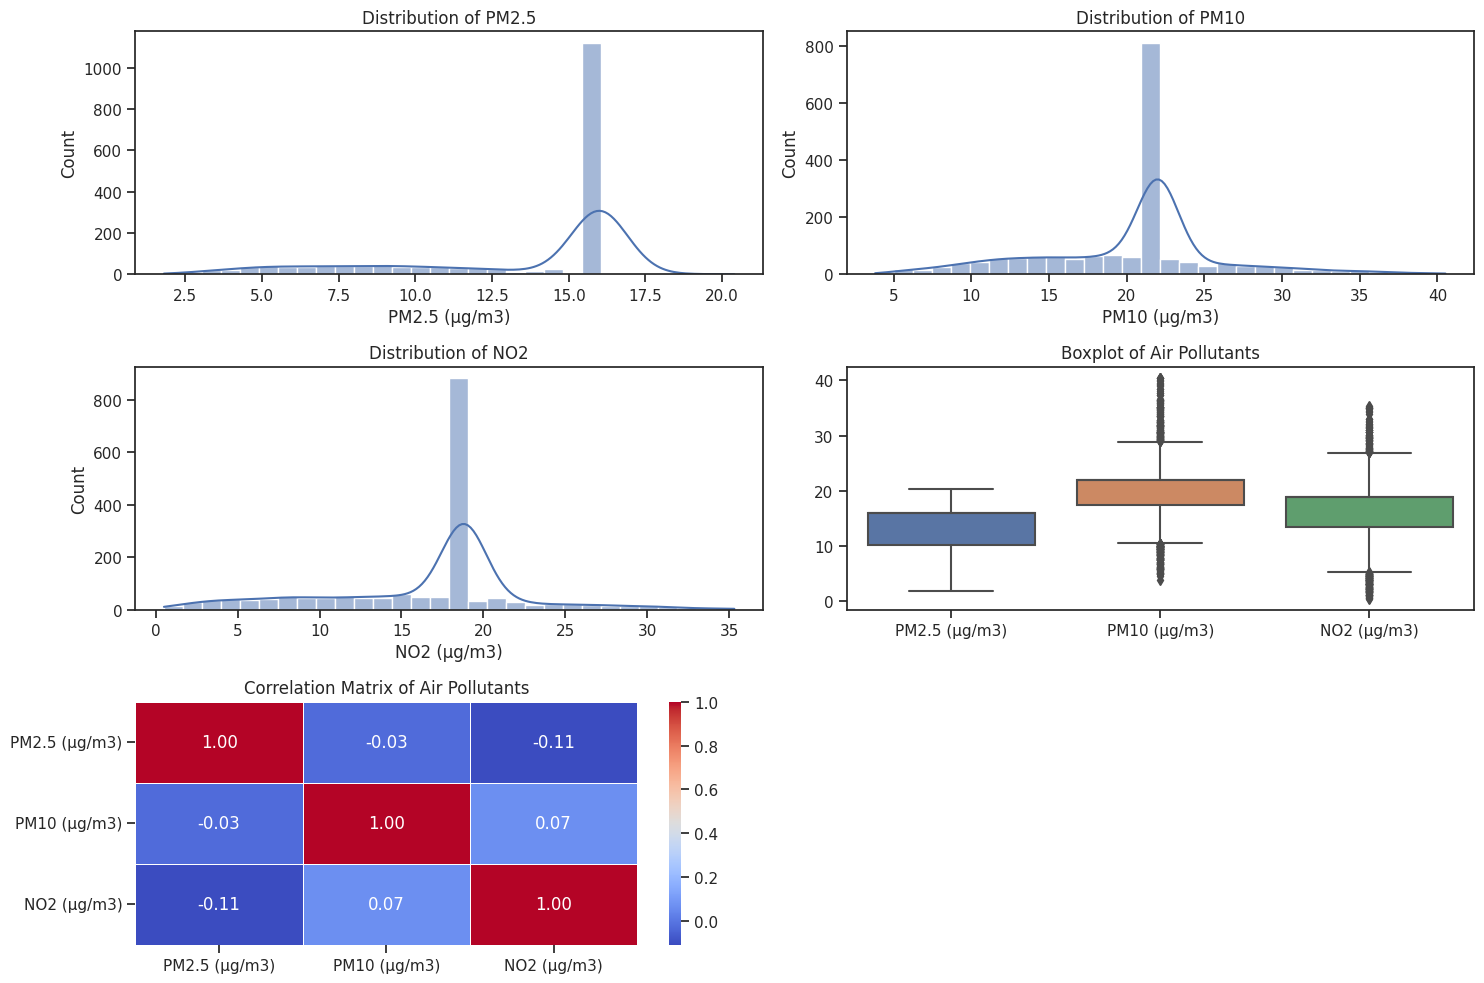

T-Test Result between PM2.5 and PM10: TtestResult(statistic=-41.439967098590905, pvalue=1.624460780502055e-306, df=3550.0)
T-Test Result between PM2.5 and NO2: TtestResult(statistic=-18.350885042240197, pvalue=6.233947438930341e-72, df=3550.0)
T-Test Result between PM10 and NO2: TtestResult(statistic=19.282915300783134, pvalue=7.076455172142856e-79, df=3550.0)


In [135]:
# Handle outliers using z-score (replace values beyond 3 standard deviations)
z_scores_air_quality = zscore(USA_Air_Pollutants_State[['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']])
USA_Air_Pollutants_State[(z_scores_air_quality < -3) | (z_scores_air_quality > 3)] = np.nan

# Impute missing values (replace NaN with mean or median)
USA_Air_Pollutants_State.fillna(USA_Air_Pollutants_State.median(), inplace=True)

# Visualize the distribution of each air pollutant
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
sns.histplot(USA_Air_Pollutants_State['PM2.5 (μg/m3)'], bins=30, kde=True)
plt.title('Distribution of PM2.5')

plt.subplot(3, 2, 2)
sns.histplot(USA_Air_Pollutants_State['PM10 (μg/m3)'], bins=30, kde=True)
plt.title('Distribution of PM10')

plt.subplot(3, 2, 3)
sns.histplot(USA_Air_Pollutants_State['NO2 (μg/m3)'], bins=30, kde=True)
plt.title('Distribution of NO2')

# Boxplot of air pollutants
plt.subplot(3, 2, 4)
sns.boxplot(data=USA_Air_Pollutants_State[['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']])
plt.title('Boxplot of Air Pollutants')

# Correlation matrix
correlation_matrix = USA_Air_Pollutants_State[['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']].corr()

# Heatmap of the correlation matrix
plt.subplot(3, 2, 5)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Air Pollutants')

plt.tight_layout()
plt.show()

# Statistical tests (e.g., t-test) to compare means between pollutants
ttest_result_pm25_pm10 = ttest_ind(USA_Air_Pollutants_State['PM2.5 (μg/m3)'].dropna(), USA_Air_Pollutants_State['PM10 (μg/m3)'].dropna())
ttest_result_pm25_no2 = ttest_ind(USA_Air_Pollutants_State['PM2.5 (μg/m3)'].dropna(), USA_Air_Pollutants_State['NO2 (μg/m3)'].dropna())
ttest_result_pm10_no2 = ttest_ind(USA_Air_Pollutants_State['PM10 (μg/m3)'].dropna(), USA_Air_Pollutants_State['NO2 (μg/m3)'].dropna())

# Print t-test results
print("T-Test Result between PM2.5 and PM10:", ttest_result_pm25_pm10)
print("T-Test Result between PM2.5 and NO2:", ttest_result_pm25_no2)
print("T-Test Result between PM10 and NO2:", ttest_result_pm10_no2)

### **PART 3**

## ***We have now a combine dataset (Air Quality & Chronic Diseases)***


In [136]:
# Assuming 'Measurement Year' and 'State' are common columns in both DataFrames
df_merged_data= pd.merge(USA_Air_Pollutants_State, df_Chro_Res_Dis, on=['Measurement Year', 'State'], how='inner')
df_merged_data

,WHO Region,ISO3,WHO Country Name,City or Locality,State,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),measure_name,location_name,sex_name,age_name,cause_name,Value
0,Region of the Americas,USA,United States of America,Albany-Schenectady-Troy (Ny),NY,2010,7.90,22.00,18.80,Deaths,New York,Male,90-94,Chronic respiratory diseases,320.31
1,Region of the Americas,USA,United States of America,Albany-Schenectady-Troy (Ny),NY,2010,7.90,22.00,18.80,Deaths,New York,Female,90-94,Chronic respiratory diseases,527.45
2,Region of the Americas,USA,United States of America,Albany-Schenectady-Troy (Ny),NY,2010,7.90,22.00,18.80,Deaths,New York,Male,<20 years,Chronic respiratory diseases,10.24
3,Region of the Americas,USA,United States of America,Albany-Schenectady-Troy (Ny),NY,2010,7.90,22.00,18.80,Deaths,New York,Female,<20 years,Chronic respiratory diseases,7.16
4,Region of the Americas,USA,United States of America,Albany-Schenectady-Troy (Ny),NY,2010,7.90,22.00,18.80,Deaths,New York,Male,95+ years,Chronic respiratory diseases,153.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17665,Region of the Americas,USA,United States of America,Washington-Arlington-Alexandria (Dc-Va-Md-Wv),WV,2019,16.00,7.60,21.20,Deaths,West Virginia,Female,95+ years,Chronic respiratory diseases,46.73
17666,Region of the Americas,USA,United States of America,Washington-Arlington-Alexandria (Dc-Va-Md-Wv),WV,2019,16.00,7.60,21.20,Deaths,West Virginia,Male,20-54 years,Chronic respiratory diseases,38.06
17667,Region of the Americas,USA,United States of America,Washington-Arlington-Alexandria (Dc-Va-Md-Wv),WV,2019,16.00,7.60,21.20,Deaths,West Virginia,Female,20-54 years,Chronic respiratory diseases,39.63
17668,Region of the Americas,USA,United States of America,Washington-Arlington-Alexandria (Dc-Va-Md-Wv),WV,2019,16.00,7.60,21.20,Deaths,West Virginia,Male,55-89 years,Chronic respiratory diseases,1080.67


In [137]:
df_merged_data.head()

,WHO Region,ISO3,WHO Country Name,City or Locality,State,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),measure_name,location_name,sex_name,age_name,cause_name,Value
0,Region of the Americas,USA,United States of America,Albany-Schenectady-Troy (Ny),NY,2010,7.90,22.00,18.80,Deaths,New York,Male,90-94,Chronic respiratory diseases,320.31
1,Region of the Americas,USA,United States of America,Albany-Schenectady-Troy (Ny),NY,2010,7.90,22.00,18.80,Deaths,New York,Female,90-94,Chronic respiratory diseases,527.45
2,Region of the Americas,USA,United States of America,Albany-Schenectady-Troy (Ny),NY,2010,7.90,22.00,18.80,Deaths,New York,Male,<20 years,Chronic respiratory diseases,10.24
3,Region of the Americas,USA,United States of America,Albany-Schenectady-Troy (Ny),NY,2010,7.90,22.00,18.80,Deaths,New York,Female,<20 years,Chronic respiratory diseases,7.16
4,Region of the Americas,USA,United States of America,Albany-Schenectady-Troy (Ny),NY,2010,7.90,22.00,18.80,Deaths,New York,Male,95+ years,Chronic respiratory diseases,153.33


In [138]:
#COrrelation Matrix Values
correlation_matrix = df_merged_data.corr()
correlation_matrix

<ipython-input-138-6deda6dcb2c2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_merged_data.corr()


,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),Value
Measurement Year,1.00,-0.05,-0.07,-0.11,0.03
PM2.5 (μg/m3),-0.05,1.00,-0.03,-0.11,-0.00
PM10 (μg/m3),-0.07,-0.03,1.00,0.07,0.07
NO2 (μg/m3),-0.11,-0.11,0.07,1.00,-0.04
Value,0.03,-0.00,0.07,-0.04,1.00


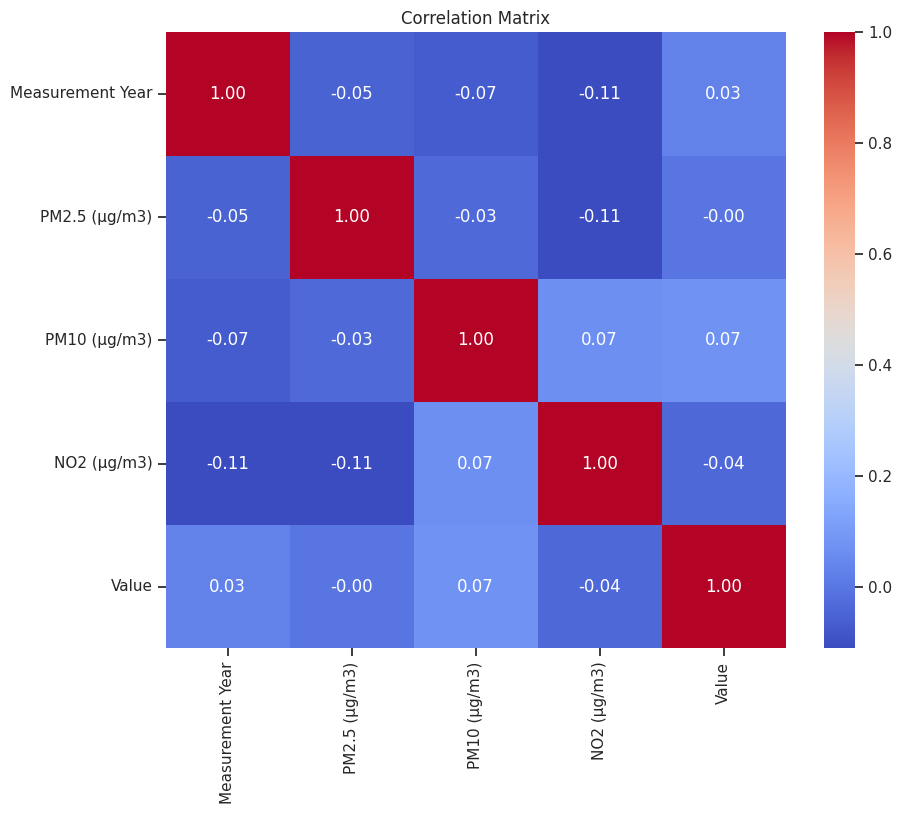

In [139]:
#Correlation Matrix VIsualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [140]:
highest_pm25_states = df_merged_data.loc[df_merged_data.groupby('Measurement Year')['PM2.5 (μg/m3)'].idxmax()]

# Display the State, Measurement Year, PM2.5 value, and corresponding Value
print(highest_pm25_states[['Measurement Year', 'State', 'PM2.5 (μg/m3)', 'Value']])

       Measurement Year State  PM2.5 (μg/m3)  Value
1500               2010    HI          18.20  31.51
2160               2011    CA          20.40 734.56
4510               2012    MT          16.60  38.15
5940               2013    CA          18.90 828.02
7490               2014    CA          20.10 846.06
9240               2015    CA          16.50 885.14
10680              2016    NM          16.00  64.56
12640              2017    CA          17.20 899.44
15620              2018    OR          18.60 131.97
16080              2019    NM          16.00  74.15


In [141]:
highest_pm25_states = df_merged_data.loc[df_merged_data.groupby('Measurement Year')['PM10 (μg/m3)'].idxmax()]

# Display the State, Measurement Year, PM2.5 value, and corresponding Value
print(highest_pm25_states[['Measurement Year', 'State', 'PM10 (μg/m3)', 'Value']])

       Measurement Year State  PM10 (μg/m3)  Value
270                2010    TX         35.10 363.85
3450               2011    AZ         40.50 144.93
5260               2012    AZ         40.52 160.19
5730               2013    CA         39.15 828.02
8820               2014    AZ         39.90 174.52
10550              2015    AZ         38.50 182.94
11260              2016    MD         39.00 119.31
12630              2017    CA         39.40 899.44
14590              2018    CA         40.40 921.53
17090              2019    IN         40.10 206.38


In [142]:
highest_pm25_states = df_merged_data.loc[df_merged_data.groupby('Measurement Year')['NO2 (μg/m3)'].idxmax()]

# Display the State, Measurement Year, PM2.5 value, and corresponding Value
print(highest_pm25_states[['Measurement Year', 'State', 'NO2 (μg/m3)', 'Value']])

       Measurement Year State  NO2 (μg/m3)  Value
360                2010    CA        34.85 666.74
3200               2011    PA        35.32 375.76
4750               2012    WI        35.00 157.26
6030               2013    WI        34.98 167.93
8340               2014    WI        32.20 171.60
10570              2015    UT        29.40  57.74
11590              2016    CO        35.00 145.69
14100              2017    NV        31.70  73.60
15030              2018    CO        32.15 155.54
16800              2019    CO        33.05 159.09


In [143]:
df_merged_data.head()

,WHO Region,ISO3,WHO Country Name,City or Locality,State,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),measure_name,location_name,sex_name,age_name,cause_name,Value
0,Region of the Americas,USA,United States of America,Albany-Schenectady-Troy (Ny),NY,2010,7.90,22.00,18.80,Deaths,New York,Male,90-94,Chronic respiratory diseases,320.31
1,Region of the Americas,USA,United States of America,Albany-Schenectady-Troy (Ny),NY,2010,7.90,22.00,18.80,Deaths,New York,Female,90-94,Chronic respiratory diseases,527.45
2,Region of the Americas,USA,United States of America,Albany-Schenectady-Troy (Ny),NY,2010,7.90,22.00,18.80,Deaths,New York,Male,<20 years,Chronic respiratory diseases,10.24
3,Region of the Americas,USA,United States of America,Albany-Schenectady-Troy (Ny),NY,2010,7.90,22.00,18.80,Deaths,New York,Female,<20 years,Chronic respiratory diseases,7.16
4,Region of the Americas,USA,United States of America,Albany-Schenectady-Troy (Ny),NY,2010,7.90,22.00,18.80,Deaths,New York,Male,95+ years,Chronic respiratory diseases,153.33


## **Section 3.2**

<ipython-input-144-14afa5c0c937>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  US_AP = df.groupby(['WHO Country Name', 'Measurement Year']).mean()


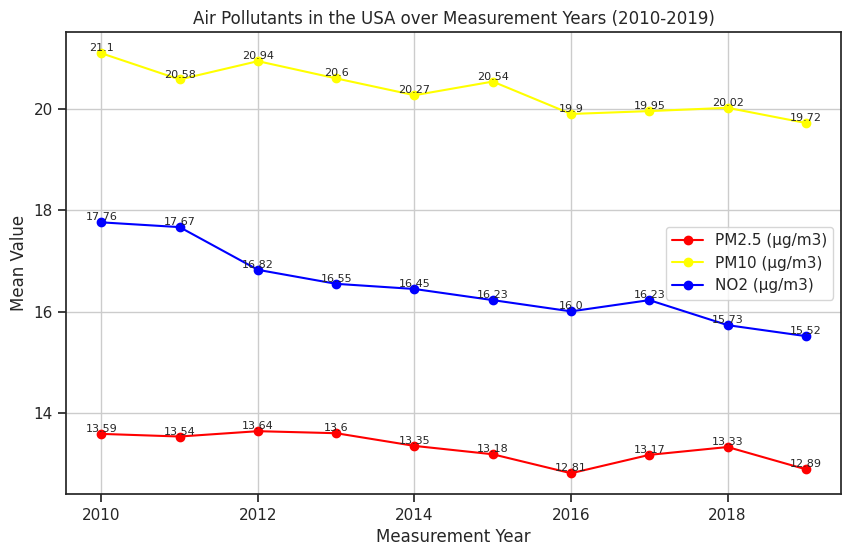

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_merged_data is your DataFrame
df = df_merged_data

# Grouping by 'WHO Country Name' and 'Measurement Year' and calculating the mean value
US_AP = df.groupby(['WHO Country Name', 'Measurement Year']).mean()

plt.figure(figsize=(10, 6))

# Extracting data for each pollutant
pm25_data = US_AP['PM2.5 (μg/m3)']
pm10_data = US_AP['PM10 (μg/m3)']
no2_data = US_AP['NO2 (μg/m3)']
years = US_AP.index.get_level_values('Measurement Year')

# Plotting each pollutant with specific colors and markers (2010-2019)
plt.plot(years, pm25_data, color='red', marker='o', linestyle='-', label='PM2.5 (μg/m3)')
plt.plot(years, pm10_data, color='yellow', marker='o', linestyle='-', label='PM10 (μg/m3)')
plt.plot(years, no2_data, color='blue', marker='o', linestyle='-', label='NO2 (μg/m3)')

# Adding values inside each data point
for i, year in enumerate(years):
    plt.text(year, pm25_data.iloc[i], str(round(pm25_data.iloc[i], 2)), ha='center', va='bottom', fontsize=8)
    plt.text(year, pm10_data.iloc[i], str(round(pm10_data.iloc[i], 2)), ha='center', va='bottom', fontsize=8)
    plt.text(year, no2_data.iloc[i], str(round(no2_data.iloc[i], 2)), ha='center', va='bottom', fontsize=8)

plt.title('Air Pollutants in the USA over Measurement Years (2010-2019)')
plt.xlabel('Measurement Year')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)
plt.show()


In [145]:
from sklearn.linear_model import LinearRegression

# Assuming you have a DataFrame `df` with historical data for PM2.5
# The DataFrame should have columns 'Measurement Year' and 'PM2.5 (μg/m3)'

# Prepare the training data
X_train = df[['Measurement Year']]  # Features (2D array)
y_train_pm25 = df['PM2.5 (μg/m3)']  # Target variable

# Create a linear regression model
model_pm25 = LinearRegression()

# Fit the model to the historical data
model_pm25.fit(X_train, y_train_pm25)

# You would repeat similar steps for PM10 and NO2


LinearRegression()

In [146]:
from sklearn.linear_model import LinearRegression

# Assuming you have a DataFrame `df` with historical data for PM10
# The DataFrame should have columns 'Measurement Year' and 'PM10 (μg/m3)'

# Prepare the training data
X_train = df[['Measurement Year']]  # Features (2D array)
y_train_pm10 = df['PM10 (μg/m3)']  # Target variable

# Create a linear regression model
model_pm10 = LinearRegression()

# Fit the model to the historical data
model_pm10.fit(X_train, y_train_pm10)

# Now model_pm10 is defined and can be used for predictions


LinearRegression()

In [147]:
from sklearn.linear_model import LinearRegression

# Assuming you have a DataFrame `df` with historical data for NO2
# The DataFrame should have columns 'Measurement Year' and 'NO2 (μg/m3)'

# Prepare the training data
X_train = df[['Measurement Year']]  # Features (2D array)
y_train_no2 = df['NO2 (μg/m3)']  # Target variable

# Create a linear regression model
model_no2 = LinearRegression()

# Fit the model to the historical data
model_no2.fit(X_train, y_train_no2)

# Now model_no2 is defined and can be used for predictions


LinearRegression()

<ipython-input-148-aca7de7381ee>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  US_AP = df.groupby(['WHO Country Name', 'Measurement Year']).mean().reset_index()
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


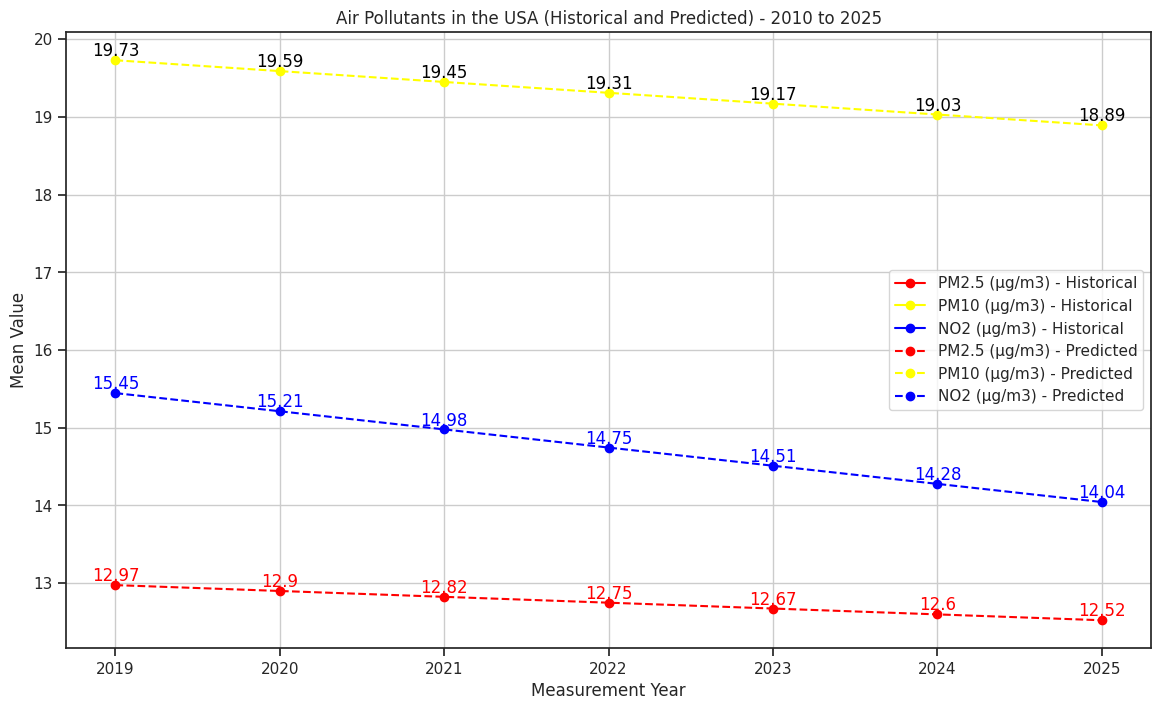

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_merged_data is your DataFrame
df = df_merged_data

# Grouping by 'WHO Country Name' and 'Measurement Year' and calculating the mean value
US_AP = df.groupby(['WHO Country Name', 'Measurement Year']).mean().reset_index()

# Filter data for the United States
us_data = US_AP[US_AP['WHO Country Name'] == 'United States']

plt.figure(figsize=(14, 8))

# Extracting data for each pollutant
pm25_data = us_data['PM2.5 (μg/m3)']
pm10_data = us_data['PM10 (μg/m3)']
no2_data = us_data['NO2 (μg/m3)']
years = us_data['Measurement Year']

# Plotting historical data for each pollutant with specific colors and markers (2010-2019)
plt.plot(years, pm25_data, color='red', marker='o', linestyle='-', label='PM2.5 (μg/m3) - Historical')
plt.plot(years, pm10_data, color='yellow', marker='o', linestyle='-', label='PM10 (μg/m3) - Historical')
plt.plot(years, no2_data, color='blue', marker='o', linestyle='-', label='NO2 (μg/m3) - Historical')

# Grouping by 'Measurement Year' and calculating the mean value for future years (2019-2025)
future_years = pd.DataFrame({'Measurement Year': range(2019, 2026)})
X_future = future_years.values.reshape(-1, 1)

pm25_pred = model_pm25.predict(X_future)
pm10_pred = model_pm10.predict(X_future)
no2_pred = model_no2.predict(X_future)

# Plotting the future predictions (2019-2025)
plt.plot(future_years, pm25_pred, color='red', marker='o', linestyle='--', label='PM2.5 (μg/m3) - Predicted')
plt.plot(future_years, pm10_pred, color='yellow', marker='o', linestyle='--', label='PM10 (μg/m3) - Predicted')
plt.plot(future_years, no2_pred, color='blue', marker='o', linestyle='--', label='NO2 (μg/m3) - Predicted')

# Adding values on top of each data point for historical data (2010-2019)
for i, year in enumerate(years):
    plt.text(year, pm25_data.iloc[i], str(round(pm25_data.iloc[i], 2)), ha='center', va='bottom')
    plt.text(year, pm10_data.iloc[i], str(round(pm10_data.iloc[i], 2)), ha='center', va='bottom')
    plt.text(year, no2_data.iloc[i], str(round(no2_data.iloc[i], 2)), ha='center', va='bottom')

# Adding values inside each data point for future predictions (2019-2025)
for i, year in enumerate(future_years['Measurement Year']):
    plt.text(year, pm25_pred[i], str(round(pm25_pred[i], 2)), ha='center', va='bottom', color='red')
    plt.text(year, pm10_pred[i], str(round(pm10_pred[i], 2)), ha='center', va='bottom', color='black')
    plt.text(year, no2_pred[i], str(round(no2_pred[i], 2)), ha='center', va='bottom', color='blue')

plt.title('Air Pollutants in the USA (Historical and Predicted) - 2010 to 2025')
plt.xlabel('Measurement Year')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)

# Add historical data (2010-2019) to the same plot
historical_data = df[(df['WHO Country Name'] == 'United States') & (df['Measurement Year'] >= 2010) & (df['Measurement Year'] <= 2019)]
plt.plot(historical_data['Measurement Year'], historical_data['PM2.5 (μg/m3)'], color='red', marker='o', linestyle='-', alpha=0.5)
plt.plot(historical_data['Measurement Year'], historical_data['PM10 (μg/m3)'], color='yellow', marker='o', linestyle='-', alpha=0.5)
plt.plot(historical_data['Measurement Year'], historical_data['NO2 (μg/m3)'], color='blue', marker='o', linestyle='-', alpha=0.5)

plt.show()


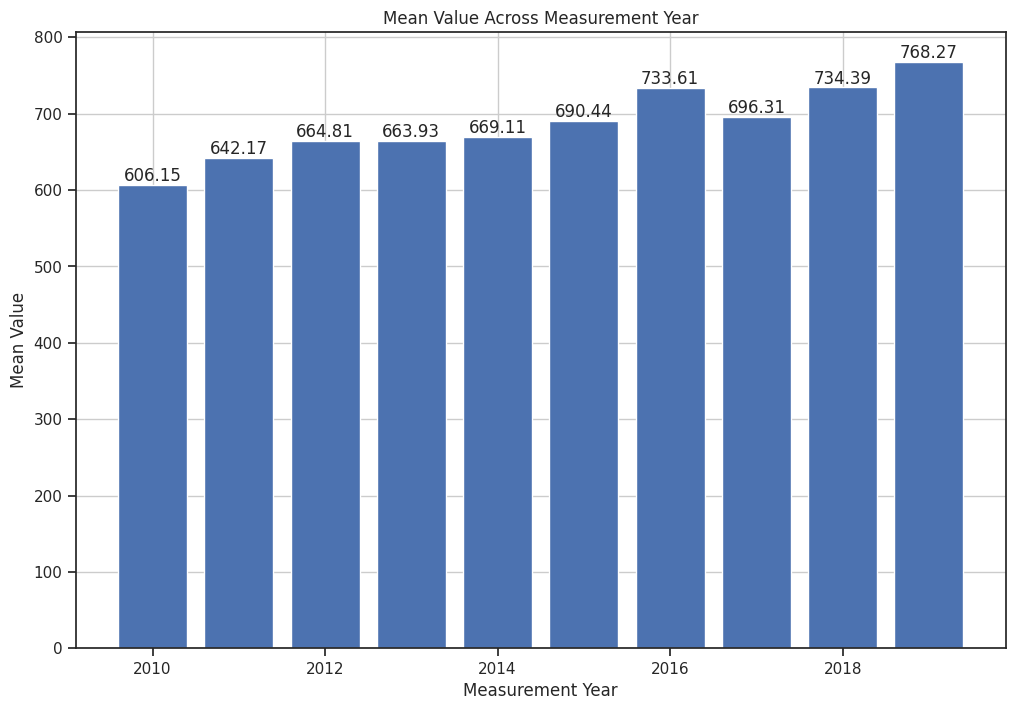

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_merged_data is your DataFrame
df = df_merged_data

# Convert the 'Value' column to numeric if needed
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Grouping by 'Measurement Year'
year_group = df.groupby('Measurement Year')

# Calculating the mean of 'Value' for each year
mean_measurement = year_group['Value'].mean().reset_index()

# Plotting the mean 'Value' for each year
plt.figure(figsize=(12, 8))
bars = plt.bar(mean_measurement['Measurement Year'], mean_measurement['Value'])
plt.title('Mean Value Across Measurement Year')
plt.xlabel('Measurement Year')
plt.ylabel('Mean Value')

# Adding the values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.grid(True)
plt.show()


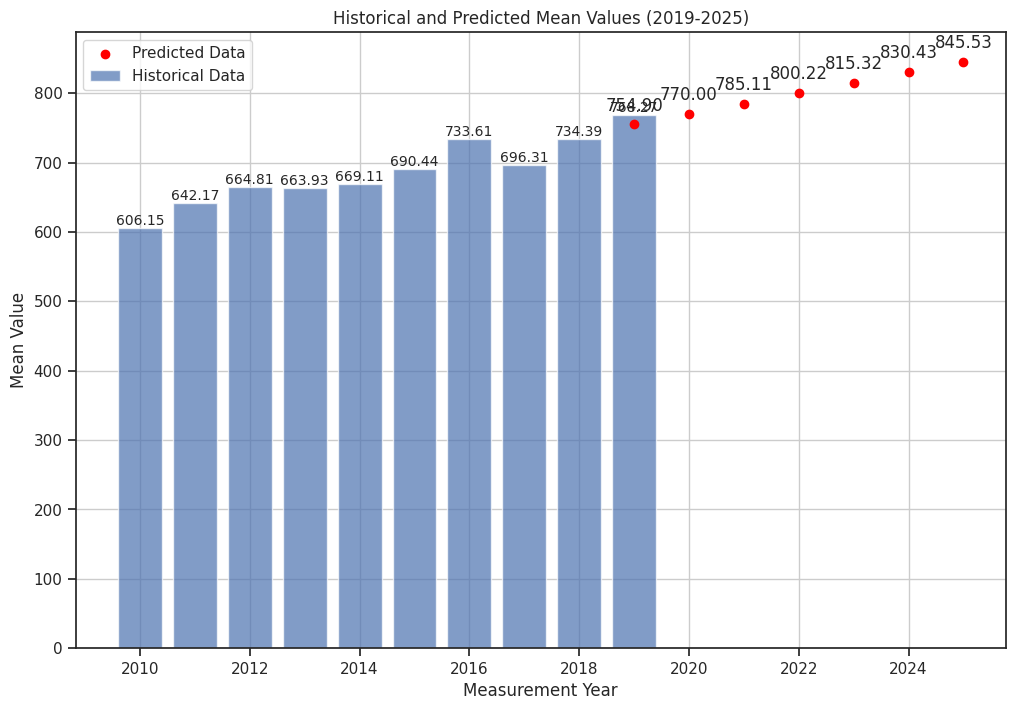

In [150]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming df_merged_data is your DataFrame
df = df_merged_data

# Convert the 'Value' column to numeric, if needed
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Grouping by 'Measurement Year' and calculating the mean of 'Value'
year_group = df.groupby('Measurement Year')['Value'].mean().reset_index()

# Preparing data for the linear regression model
X = year_group[['Measurement Year']]
y = year_group['Value']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Prepare data frame for future years (2019 - 2025)
future_years = pd.DataFrame({'Measurement Year': range(2019, 2026)})
future_years['Predicted Value'] = model.predict(future_years[['Measurement Year']])

# Plotting historical data and future predictions
plt.figure(figsize=(12, 8))
for i in range(len(year_group['Measurement Year'])):
    plt.text(year_group['Measurement Year'][i], year_group['Value'][i], f'{year_group["Value"][i]:.2f}', ha='center', va='bottom', fontsize=10)
plt.bar(year_group['Measurement Year'], year_group['Value'], label='Historical Data', align='center', alpha=0.7)
plt.scatter(future_years['Measurement Year'], future_years['Predicted Value'], color='red', label='Predicted Data', marker='o')
for i, txt in enumerate(future_years['Predicted Value']):
    plt.annotate(f'{txt:.2f}', (future_years['Measurement Year'][i], txt), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Historical and Predicted Mean Values (2019-2025)')
plt.xlabel('Measurement Year')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)
plt.show()


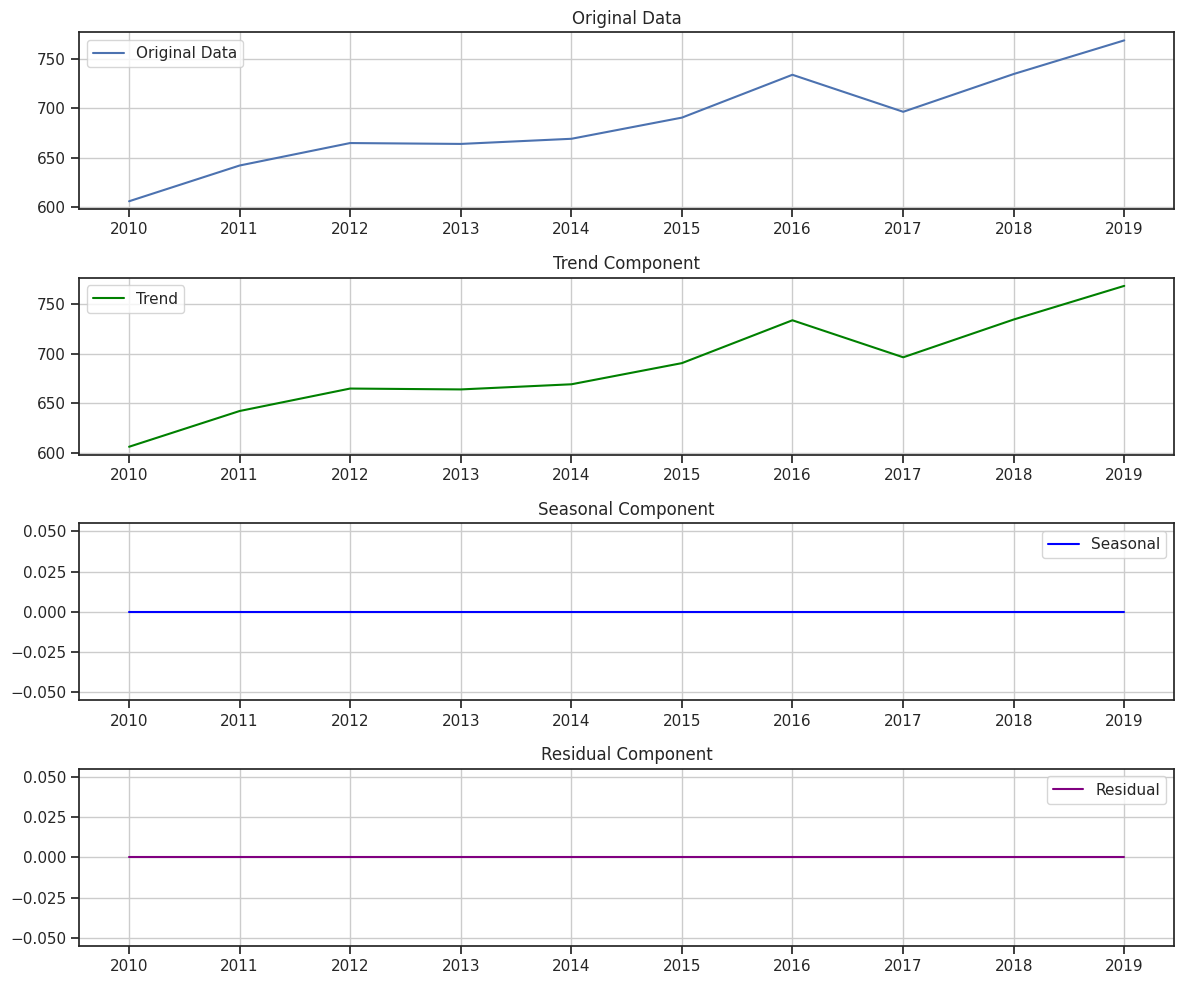

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming df_merged_data is your DataFrame
df = df_merged_data

# Convert the 'Value' column to numeric if needed
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Convert 'Measurement Year' to a datetime object
df['Measurement Year'] = pd.to_datetime(df['Measurement Year'], format='%Y')

# Grouping by 'Measurement Year'
year_group = df.groupby('Measurement Year')

# Calculating the mean of 'Value' for each year
mean_measurement = year_group['Value'].mean().reset_index()

# Time Series Analysis Components
# Decompose the time series to analyze its components (trend, seasonality, and residuals)
decomposition = sm.tsa.seasonal_decompose(mean_measurement.set_index('Measurement Year')['Value'], model='additive')

# Plotting the original data, trend, seasonality, and residuals
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(mean_measurement['Measurement Year'], mean_measurement['Value'], label='Original Data')
plt.legend()
plt.grid(True)
plt.title('Original Data')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.legend()
plt.grid(True)
plt.title('Trend Component')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='blue')
plt.legend()
plt.grid(True)
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='purple')
plt.legend()
plt.grid(True)
plt.title('Residual Component')

plt.tight_layout()
plt.show()
